<a href="https://colab.research.google.com/github/nhjung74/paper/blob/main/factor_rl_portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install shimmy>=0.2.1

In [ ]:
!pip install stable-baselines3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.5/184.5 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 73.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 59.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 104.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

# 첫 번째 실험 (PPO + Crypto + Sharpe 보상)

다음 6가지 실험을 한 번에 실행하고 결과를 비교

Crypto_PPO_sharpe

Crypto_PPO_beta

Crypto_SAC_sharpe

Crypto_SAC_beta

Crypto_TD3_sharpe

Crypto_TD3_beta

▶ Running: Crypto_PPO_sharpe
YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  4 of 4 completed
/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(
[*********************100%***********************]  4 of 4 completed

▶ Running: Crypto_PPO_beta



/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(
[*********************100%***********************]  4 of 4 completed


▶ Running: Crypto_PPO_hybrid


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(
[*********************100%***********************]  4 of 4 completed

▶ Running: Crypto_SAC_sharpe



/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(
[*********************100%***********************]  4 of 4 completed

▶ Running: Crypto_SAC_beta



/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(
[*********************100%***********************]  4 of 4 completed

▶ Running: Crypto_SAC_hybrid



/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(
[*********************100%***********************]  4 of 4 completed

▶ Running: Crypto_TD3_sharpe



/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(
[*********************100%***********************]  4 of 4 completed

▶ Running: Crypto_TD3_beta



/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(
[*********************100%***********************]  4 of 4 completed

▶ Running: Crypto_TD3_hybrid



/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(
<ipython-input-3-0a03095b17b7>:123: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = series[-1] / series[0] - 1
<ipython-input-3-0a03095b17b7>:124: FutureWarning: Series.__getitem__ treating keys as positions is depreca

                   Sharpe Ratio  Sortino Ratio  Cumulative Return  \
Crypto_PPO_sharpe      1.121604       1.597100          39.403807   
Crypto_PPO_beta        1.963413       3.004911         450.578769   
Crypto_PPO_hybrid      1.420095       2.068557         108.300446   
Crypto_SAC_sharpe      1.381998       1.967225          62.494341   
Crypto_SAC_beta        2.601646       4.203585        2578.677917   
Crypto_SAC_hybrid      1.375056       2.041810          74.727800   
Crypto_TD3_sharpe      1.193977       1.778681          60.280678   
Crypto_TD3_beta        3.094463       4.935423        5722.510723   
Crypto_TD3_hybrid      1.638694       2.496411         130.768766   

                   Annualized Return  Annualized Volatility      CAGR  \
Crypto_PPO_sharpe           0.744547               0.663822  0.744547   
Crypto_PPO_beta             1.508411               0.768259  1.508411   
Crypto_PPO_hybrid           1.026311               0.722705  1.026311   
Crypto_SAC_sharpe

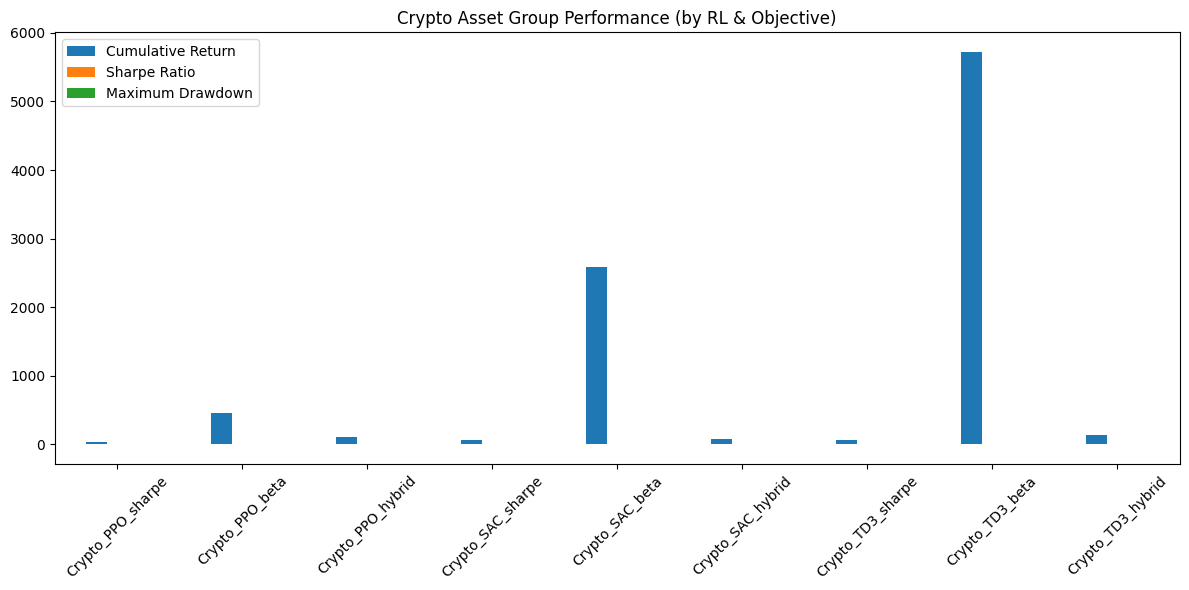

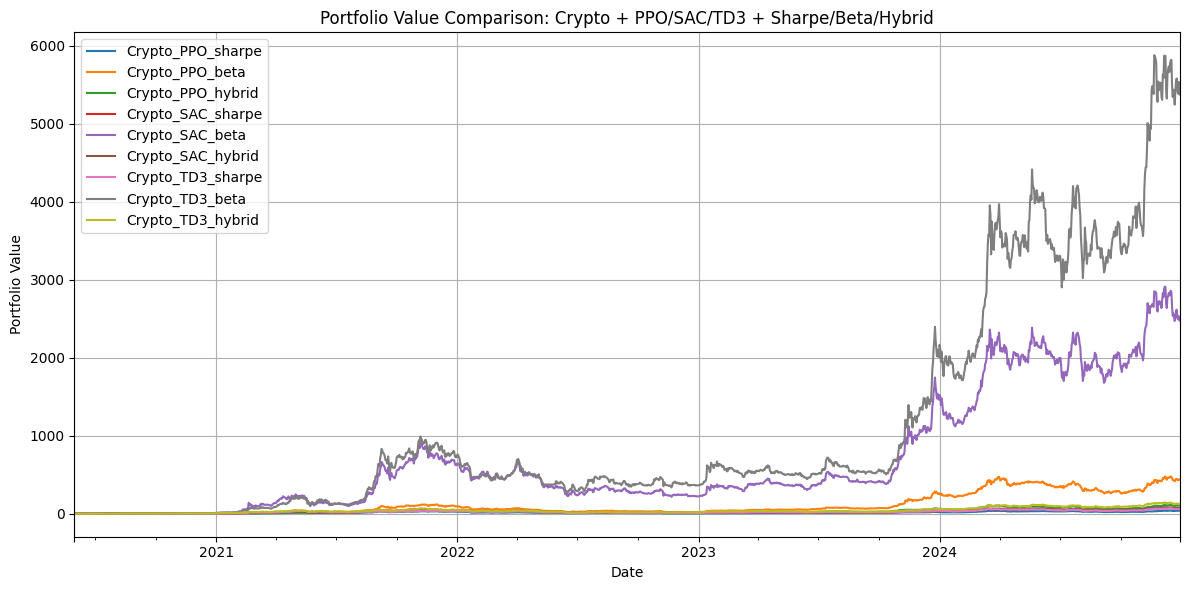

In [ ]:
import gym
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from gym import spaces
from stable_baselines3 import PPO, SAC, TD3
from stable_baselines3.common.vec_env import DummyVecEnv
import torch
import random

# Seed
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)

# Asset Group
crypto_assets = ["BTC-USD", "ETH-USD", "BNB-USD", "SOL-USD"]

# Data
def fetch_data(assets, start="2019-01-01", end="2024-12-31"):
    data = yf.download(assets, start=start, end=end)["Close"]
    price = data.dropna()
    returns = price.pct_change().dropna()
    momentum = price.pct_change(20)
    volatility = returns.rolling(20).std()
    factors = pd.concat([momentum.add_suffix("_mom"), volatility.add_suffix("_vol")], axis=1).dropna()
    idx = returns.index.intersection(factors.index)
    return price.loc[idx], returns.loc[idx], factors.loc[idx]

# Environment
class PPOPortfolioEnv(gym.Env):
    def __init__(self, returns, factors, price, objective="sharpe"):
        super().__init__()
        self.returns = returns
        self.factors = factors
        self.price = price
        self.assets = returns.columns.tolist()
        self.n_assets = len(self.assets)
        self.window = 30
        self.current = self.window
        self.cash = 1.0
        self.asset_quantity = np.zeros(self.n_assets)
        self.portfolio_value = [1.0]
        self.portfolio_returns = []
        self.objective = objective
        self.action_space = spaces.Box(low=0, high=1, shape=(self.n_assets,), dtype=np.float32)
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf,
                                            shape=(self.window, factors.shape[1]), dtype=np.float32)

    def reset(self):
        self.current = self.window
        self.cash = 1.0
        self.asset_quantity = np.zeros(self.n_assets)
        self.portfolio_value = [1.0]
        self.portfolio_returns = []
        return self.factors.iloc[self.current - self.window:self.current].values

    def step(self, action):
        action = np.clip(action, 0, 1)
        action /= (np.sum(action) + 1e-8)
        price_today = self.price.iloc[self.current].values
        total_value = self.cash + np.sum(self.asset_quantity * price_today)
        desired_value = action * total_value
        current_value = self.asset_quantity * price_today
        trade_value = desired_value - current_value
        cost = np.sum(np.abs(trade_value) * 0.001)
        self.cash -= cost
        self.asset_quantity += trade_value / price_today
        self.cash = total_value - np.sum(self.asset_quantity * price_today)
        price_next = self.price.iloc[self.current + 1].values
        port_value_next = self.cash + np.sum(self.asset_quantity * price_next)
        port_return = (port_value_next - self.portfolio_value[-1]) / self.portfolio_value[-1]
        self.portfolio_returns.append(port_return)
        self.portfolio_value.append(port_value_next)
        self.current += 1
        done = self.current + 1 >= len(self.returns)
        obs = self.factors.iloc[self.current - self.window:self.current].values
        # 보상함수
        if self.objective == "sharpe":
            r = np.array(self.portfolio_returns[-30:])
            reward = np.mean(r) / (np.std(r) + 1e-6)
        elif self.objective == "beta":
            beta_score = self.factors.iloc[self.current - 1][[a + "_mom" for a in self.assets if a + "_mom" in self.factors.columns]].values
            reward = np.dot(action, beta_score)
        elif self.objective == "hybrid":
            r = np.array(self.portfolio_returns[-30:])
            sharpe = np.mean(r) / (np.std(r) + 1e-6)
            beta_score = self.factors.iloc[self.current - 1][[a + "_mom" for a in self.assets if a + "_mom" in self.factors.columns]].values
            beta = np.dot(action, beta_score)
            reward = 0.5 * sharpe + 0.5 * beta
        else:
            reward = port_return
        return obs, reward, done, {"portfolio_value": port_value_next}

# Training & Evaluation
def train_and_evaluate(assets, algo_class, objective="sharpe"):
    price, returns, factors = fetch_data(assets)
    def make_env():
        return PPOPortfolioEnv(returns, factors, price, objective)
    env = DummyVecEnv([make_env])
    model = algo_class("MlpPolicy", env, verbose=0, seed=SEED)
    model.learn(total_timesteps=50000)

    # 평가 시뮬레이션
    env_eval = make_env()
    obs = env_eval.reset()
    values = []
    while True:
        action, _ = model.predict(obs)
        obs, reward, done, info = env_eval.step(action)
        values.append(info["portfolio_value"])
        if done:
            break
    index = price.index[31:31+len(values)]
    return pd.Series(values, index=index)

# 성과 계산
# 성과 지표 계산
def performance_metrics(series):
    returns = series.pct_change().dropna()
    cumulative_return = series[-1] / series[0] - 1
    annualized_return = (series[-1] / series[0]) ** (252 / len(series)) - 1
    annualized_vol = returns.std() * np.sqrt(252)
    cagr = (series[-1] / series[0]) ** (252 / len(series)) - 1
    annualized_vol = returns.std() * np.sqrt(252)
    sharpe = (cagr - 0.0) / (annualized_vol + 1e-6)
    downside_std = returns[returns < 0].std() * np.sqrt(252)
    sortino = (cagr - 0.0) / (downside_std + 1e-6)
    peak = series.cummax()
    drawdown = (series - peak) / peak
    mdd = drawdown.min()
    turnover = (np.abs(returns).sum()) / len(returns)
    return {
        "Sharpe Ratio": sharpe,
        "Sortino Ratio": sortino,
        "Cumulative Return": cumulative_return,
        "Annualized Return": cagr,
        "Annualized Volatility": annualized_vol,
        "CAGR": cagr,
        "Maximum Drawdown": mdd,
        "Turnover Ratio": turnover
    }

# 실험 실행
experiments = [
    ("Crypto", crypto_assets, "PPO", PPO, "sharpe"),
    ("Crypto", crypto_assets, "PPO", PPO, "beta"),
    ("Crypto", crypto_assets, "PPO", PPO, "hybrid"),
    ("Crypto", crypto_assets, "SAC", SAC, "sharpe"),
    ("Crypto", crypto_assets, "SAC", SAC, "beta"),
    ("Crypto", crypto_assets, "SAC", SAC, "hybrid"),
    ("Crypto", crypto_assets, "TD3", TD3, "sharpe"),
    ("Crypto", crypto_assets, "TD3", TD3, "beta"),
    ("Crypto", crypto_assets, "TD3", TD3, "hybrid")
]

results = {}
for group, assets, algo_name, algo_class, objective in experiments:
    key = f"{group}_{algo_name}_{objective}"
    print(f"▶ Running: {key}")
    results[key] = train_and_evaluate(assets, algo_class, objective)

# 성과 테이블 생성
metrics_table = pd.DataFrame({k: performance_metrics(v) for k, v in results.items()}).T
print(metrics_table)

# 성과 막대 그래프
metrics_table[["Cumulative Return", "Sharpe Ratio", "Maximum Drawdown"]].plot(
    kind="bar", figsize=(12, 6), title="Crypto Asset Group Performance (by RL & Objective)"
)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 포트폴리오 가치 통합 시계열 그래프
results_df = pd.DataFrame(results)
results_df.plot(figsize=(12, 6), title="Portfolio Value Comparison: Crypto + PPO/SAC/TD3 + Sharpe/Beta/Hybrid")
plt.xlabel("Date")
plt.ylabel("Portfolio Value")
plt.grid(True)
plt.tight_layout()
plt.show()


Stock_PPO_sharpe

Stock_PPO_beta

Stock_SAC_sharpe

Stock_SAC_beta

Stock_TD3_sharpe

Stock_TD3_beta

In [ ]:
import gym
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from gym import spaces
from stable_baselines3 import PPO, SAC, TD3
from stable_baselines3.common.vec_env import DummyVecEnv
import torch
import random

# Seed 설정
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)

# 자산군 설정
stock_assets = ["AAPL", "MSFT", "GOOGL", "AMZN"]

# 데이터 수집 함수
def fetch_data(assets, start="2019-01-01", end="2024-12-31"):
    data = yf.download(assets, start=start, end=end)["Close"]
    price = data.dropna()
    returns = price.pct_change().dropna()
    momentum = price.pct_change(20)
    volatility = returns.rolling(20).std()
    factors = pd.concat([momentum.add_suffix("_mom"), volatility.add_suffix("_vol")], axis=1).dropna()
    idx = returns.index.intersection(factors.index)
    return price.loc[idx], returns.loc[idx], factors.loc[idx]

# 강화학습 환경
class PPOPortfolioEnv(gym.Env):
    def __init__(self, returns, factors, price, objective="sharpe"):
        super().__init__()
        self.returns = returns
        self.factors = factors
        self.price = price
        self.assets = returns.columns.tolist()
        self.n_assets = len(self.assets)
        self.window = 30
        self.current = self.window
        self.cash = 1.0
        self.asset_quantity = np.zeros(self.n_assets)
        self.portfolio_value = [1.0]
        self.portfolio_returns = []
        self.objective = objective
        self.action_space = spaces.Box(low=0, high=1, shape=(self.n_assets,), dtype=np.float32)
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf,
                                            shape=(self.window, factors.shape[1]), dtype=np.float32)

    def reset(self):
        self.current = self.window
        self.cash = 1.0
        self.asset_quantity = np.zeros(self.n_assets)
        self.portfolio_value = [1.0]
        self.portfolio_returns = []
        return self.factors.iloc[self.current - self.window:self.current].values

    def step(self, action):
        action = np.clip(action, 0, 1)
        action /= (np.sum(action) + 1e-8)
        price_today = self.price.iloc[self.current].values
        total_value = self.cash + np.sum(self.asset_quantity * price_today)
        desired_value = action * total_value
        current_value = self.asset_quantity * price_today
        trade_value = desired_value - current_value
        cost = np.sum(np.abs(trade_value) * 0.001)
        self.cash -= cost
        self.asset_quantity += trade_value / price_today
        self.cash = total_value - np.sum(self.asset_quantity * price_today)
        price_next = self.price.iloc[self.current + 1].values
        port_value_next = self.cash + np.sum(self.asset_quantity * price_next)
        port_return = (port_value_next - self.portfolio_value[-1]) / self.portfolio_value[-1]
        self.portfolio_returns.append(port_return)
        self.portfolio_value.append(port_value_next)
        self.current += 1
        done = self.current + 1 >= len(self.returns)
        obs = self.factors.iloc[self.current - self.window:self.current].values
        # 보상함수
        if self.objective == "sharpe":
            r = np.array(self.portfolio_returns[-30:])
            reward = np.mean(r) / (np.std(r) + 1e-6)
        elif self.objective == "beta":
            beta_score = self.factors.iloc[self.current - 1][[a + "_mom" for a in self.assets if a + "_mom" in self.factors.columns]].values
            reward = np.dot(action, beta_score)
        elif self.objective == "hybrid":
            r = np.array(self.portfolio_returns[-30:])
            sharpe = np.mean(r) / (np.std(r) + 1e-6)
            beta_score = self.factors.iloc[self.current - 1][[a + "_mom" for a in self.assets if a + "_mom" in self.factors.columns]].values
            beta = np.dot(action, beta_score)
            reward = 0.5 * sharpe + 0.5 * beta
        else:
            reward = port_return
        return obs, reward, done, {"portfolio_value": port_value_next}

# 훈련 및 평가 함수
def train_and_evaluate(assets, algo_class, objective="sharpe"):
    price, returns, factors = fetch_data(assets)
    def make_env():
        return PPOPortfolioEnv(returns, factors, price, objective)
    env = DummyVecEnv([make_env])
    model = algo_class("MlpPolicy", env, verbose=0, seed=SEED)
    model.learn(total_timesteps=50000)

    # 평가
    env_eval = make_env()
    obs = env_eval.reset()
    values = []
    while True:
        action, _ = model.predict(obs)
        obs, reward, done, info = env_eval.step(action)
        values.append(info["portfolio_value"])
        if done:
            break
    index = price.index[31:31+len(values)]
    return pd.Series(values, index=index)

# 성과 지표 계산
def performance_metrics(series):
    returns = series.pct_change().dropna()
    cumulative_return = series[-1] / series[0] - 1
    annualized_return = (series[-1] / series[0]) ** (252 / len(series)) - 1
    annualized_vol = returns.std() * np.sqrt(252)
    cagr = (series[-1] / series[0]) ** (252 / len(series)) - 1
    annualized_vol = returns.std() * np.sqrt(252)
    sharpe = (cagr - 0.0) / (annualized_vol + 1e-6)
    downside_std = returns[returns < 0].std() * np.sqrt(252)
    sortino = (cagr - 0.0) / (downside_std + 1e-6)
    peak = series.cummax()
    drawdown = (series - peak) / peak
    mdd = drawdown.min()
    turnover = (np.abs(returns).sum()) / len(returns)
    return {
        "Sharpe Ratio": sharpe,
        "Sortino Ratio": sortino,
        "Cumulative Return": cumulative_return,
        "Annualized Return": cagr,
        "Annualized Volatility": annualized_vol,
        "CAGR": cagr,
        "Maximum Drawdown": mdd,
        "Turnover Ratio": turnover
    }

# 실험 구성
experiments = [
    ("Stock", stock_assets, "PPO", PPO, "sharpe"),
    ("Stock", stock_assets, "PPO", PPO, "beta"),
    ("Stock", stock_assets, "PPO", PPO, "hybrid"),
  #  ("Stock", stock_assets, "SAC", SAC, "sharpe"),
   # ("Stock", stock_assets, "SAC", SAC, "beta"),
  #  ("Stock", stock_assets, "SAC", SAC, "hybrid"),
  #  ("Stock", stock_assets, "TD3", TD3, "sharpe"),
  #  ("Stock", stock_assets, "TD3", TD3, "beta"),
  #  ("Stock", stock_assets, "TD3", TD3, "hybrid")
]

# 실험 실행
results = {}
for group, assets, algo_name, algo_class, objective in experiments:
    key = f"{group}_{algo_name}_{objective}"
    print(f"▶ Running: {key}")
    results[key] = train_and_evaluate(assets, algo_class, objective)

# 성과 요약
metrics_table = pd.DataFrame({k: performance_metrics(v) for k, v in results.items()}).T
print(metrics_table)

# 성과 막대그래프
metrics_table[["Cumulative Return", "Sharpe Ratio", "Maximum Drawdown"]].plot(
    kind="bar", figsize=(12, 6), title="Stock Asset Group Performance (by RL & Objective)"
)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 포트폴리오 가치 시계열 그래프 (겹침)
results_df = pd.DataFrame(results)
results_df.plot(figsize=(12, 6), title="Portfolio Value Comparison: Stock + PPO/SAC/TD3 + Sharpe/Beta/hybrid")
plt.xlabel("Date")
plt.ylabel("Portfolio Value")
plt.grid(True)
plt.tight_layout()
plt.show()


[*********************100%***********************]  4 of 4 completed

▶ Running: Stock_PPO_sharpe



/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(
[*********************100%***********************]  4 of 4 completed

▶ Running: Stock_PPO_beta



/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


KeyboardInterrupt: 

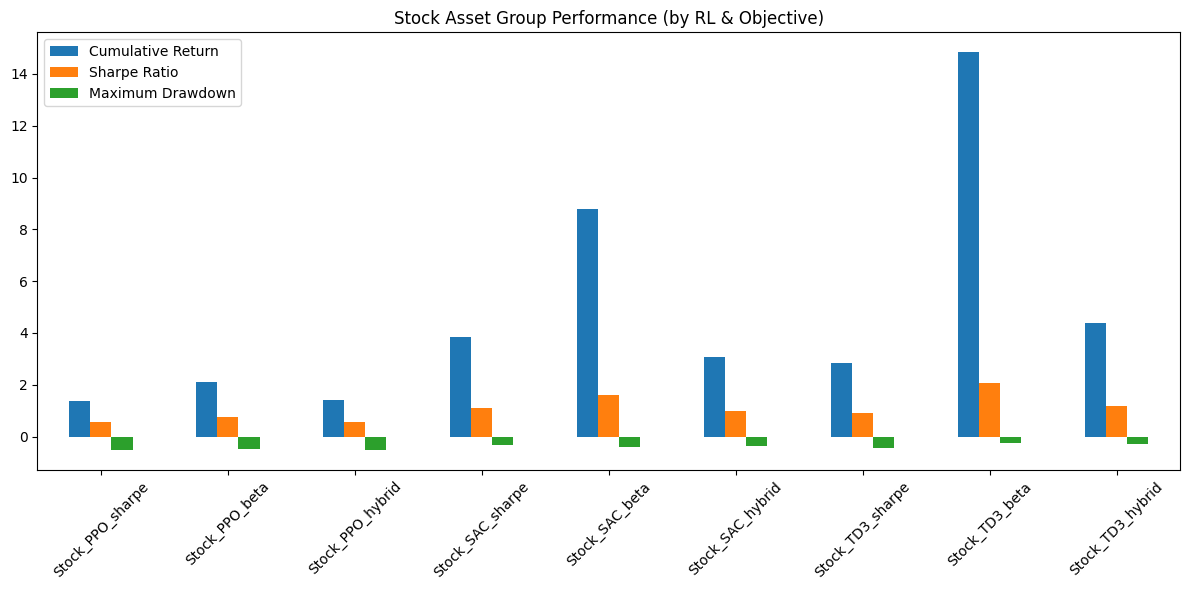

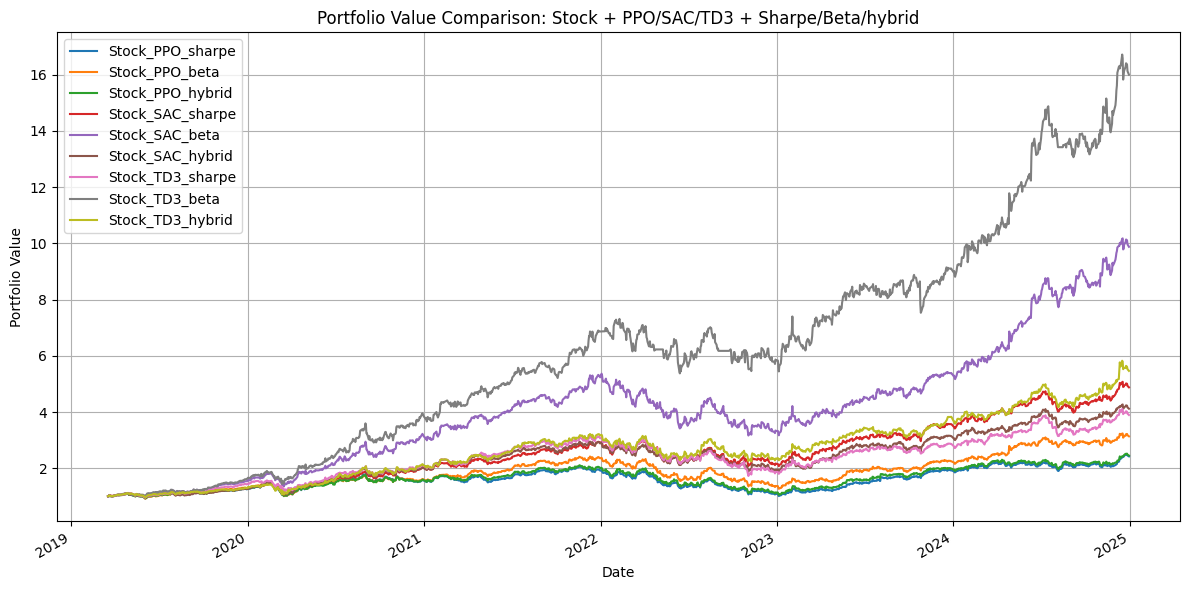

In [ ]:

# 성과 막대그래프
metrics_table[["Cumulative Return", "Sharpe Ratio", "Maximum Drawdown"]].plot(
    kind="bar", figsize=(12, 6), title="Stock Asset Group Performance (by RL & Objective)"
)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 포트폴리오 가치 시계열 그래프 (겹침)
results_df = pd.DataFrame(results)
results_df.plot(figsize=(12, 6), title="Portfolio Value Comparison: Stock + PPO/SAC/TD3 + Sharpe/Beta/hybrid")
plt.xlabel("Date")
plt.ylabel("Portfolio Value")
plt.grid(True)
plt.tight_layout()
plt.show()


# 전체 혼합 자산 기반 강화학습 포트폴리오 최적화 코드 (Sharpe, Beta, Hybrid 보상 포함)

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import gym
from gym import spaces
from stable_baselines3 import PPO, SAC, TD3
from stable_baselines3.common.vec_env import DummyVecEnv
from sklearn.ensemble import GradientBoostingRegressor
import shap
import torch, random, gc

# Seed
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)

# 혼합 자산군
mixed_assets = ["BTC-USD", "ETH-USD", "AAPL", "MSFT", "GOOGL", "AMZN", "BNB-USD", "SOL-USD"]

# 데이터 함수
def fetch_data(assets, start="2019-01-01", end="2024-12-31"):
    data = yf.download(assets, start=start, end=end)
    price = data["Close"].dropna()
    volume = data["Volume"].dropna()
    returns = price.pct_change().dropna()
    momentum = price.pct_change(20)
    volatility = returns.rolling(20).std()
    ma_deviation = (price - price.rolling(20).mean()) / price.rolling(20).mean()
    volume_zscore = (volume - volume.rolling(30).mean()) / volume.rolling(30).std()
    factors = pd.concat([
        momentum.add_suffix("_mom"),
        volatility.add_suffix("_vol"),
        ma_deviation.add_suffix("_ma"),
        volume_zscore.add_suffix("_volz")
    ], axis=1).dropna()
    idx = returns.index.intersection(factors.index)
    return price.loc[idx], returns.loc[idx], factors.loc[idx]

# 환경 정의
class PortfolioEnv(gym.Env):
    def __init__(self, returns, factors, price, objective="sharpe"):
        super().__init__()
        self.returns = returns
        self.factors = factors
        self.price = price
        self.assets = returns.columns.tolist()
        self.n_assets = len(self.assets)
        self.window = 30
        self.current = self.window
        self.cash = 1.0
        self.asset_quantity = np.zeros(self.n_assets)
        self.portfolio_value = [1.0]
        self.portfolio_returns = []
        self.objective = objective
        self.action_space = spaces.Box(low=0, high=1, shape=(self.n_assets,), dtype=np.float32)
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(self.window, factors.shape[1]), dtype=np.float32)

    def reset(self):
        self.current = self.window
        self.cash = 1.0
        self.asset_quantity = np.zeros(self.n_assets)
        self.portfolio_value = [1.0]
        self.portfolio_returns = []
        return self.factors.iloc[self.current - self.window:self.current].values

    def step(self, action):
        action = np.clip(action, 0, 1)
        action /= (np.sum(action) + 1e-8)
        price_today = self.price.iloc[self.current].values
        total_value = self.cash + np.sum(self.asset_quantity * price_today)
        desired_value = action * total_value
        current_value = self.asset_quantity * price_today
        trade_value = desired_value - current_value
        cost = np.sum(np.abs(trade_value) * 0.001)
        self.cash -= cost
        self.asset_quantity += trade_value / price_today
        self.cash = total_value - np.sum(self.asset_quantity * price_today)

        price_next = self.price.iloc[self.current + 1].values
        port_value_next = self.cash + np.sum(self.asset_quantity * price_next)
        port_return = (port_value_next - self.portfolio_value[-1]) / self.portfolio_value[-1]
        self.portfolio_returns.append(port_return)
        self.portfolio_value.append(port_value_next)
        self.current += 1
        done = self.current + 1 >= len(self.returns)
        obs = self.factors.iloc[self.current - self.window:self.current].values

        # 보상함수
        if self.objective == "sharpe":
            r = np.array(self.portfolio_returns[-30:])
            reward = np.mean(r) / (np.std(r) + 1e-6)
        elif self.objective == "beta":
            beta_score = self.factors.iloc[self.current - 1][[a + "_mom" for a in self.assets if a + "_mom" in self.factors.columns]].values
            reward = np.dot(action, beta_score)
        elif self.objective == "hybrid":
            r = np.array(self.portfolio_returns[-30:])
            sharpe = np.mean(r) / (np.std(r) + 1e-6)
            beta_score = self.factors.iloc[self.current - 1][[a + "_mom" for a in self.assets if a + "_mom" in self.factors.columns]].values
            beta = np.dot(action, beta_score)
            reward = 0.5 * sharpe + 0.5 * beta
        else:
            reward = port_return

        return obs, reward, done, {"portfolio_value": port_value_next}

# 학습 및 평가
def train_and_evaluate(assets, algo_class, objective="sharpe"):
    price, returns, factors = fetch_data(assets)
    def make_env():
        return PortfolioEnv(returns, factors, price, objective)
    env = DummyVecEnv([make_env])
    model = algo_class("MlpPolicy", env, verbose=0, seed=SEED)
    model.learn(total_timesteps=50000)

    env_eval = make_env()
    obs = env_eval.reset()
    values, states = [], []
    while True:
        action, _ = model.predict(obs)
        obs, reward, done, info = env_eval.step(action)
        values.append(info["portfolio_value"])
        states.append(obs.flatten())
        if done:
            break
    index = price.index[31:31+len(values)]

    # SHAP 해석용 데이터
    shap_df = pd.DataFrame(states, columns=[f"F{i}" for i in range(len(states[0]))])
    gbm = GradientBoostingRegressor().fit(shap_df, values)
    explainer = shap.Explainer(gbm)
    shap_values = explainer(shap_df)
    shap.summary_plot(shap_values, shap_df, plot_type="bar")

    # 베타 유사 구조 시각화
    states = [env_eval.reset()]
    for _ in range(10):
        action, _ = model.predict(states[-1], deterministic=True)
        obs, _, done, _ = env_eval.step(action)
        if done:
            break
        states.append(obs)

    avg_actions = np.mean([model.predict(s, deterministic=True)[0] for s in states], axis=0)
    print("평균 Action (예시):", avg_actions)

    #avg_actions = np.mean([model.predict(s.reshape(1, *s.shape))[0] for s in states], axis=0)
    latest_factors = factors.iloc[-1][[a + "_mom" for a in price.columns if a in price.columns]]
    beta_exposure = pd.Series(avg_actions, index=price.columns[:len(avg_actions)]) * latest_factors.values
    beta_exposure.plot(kind="bar", title="Beta Exposure Structure (Momentum × Allocation)", figsize=(10, 4))
    plt.ylabel("Exposure Score")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 정리 및 리소스 해제
    del model
    gc.collect()

    return pd.Series(values, index=index)

# 성과 지표 계산
def performance_metrics(series):
    returns = series.pct_change().dropna()
    cumulative_return = series[-1] / series[0] - 1
    annualized_return = (series[-1] / series[0]) ** (252 / len(series)) - 1
    annualized_vol = returns.std() * np.sqrt(252)
    cagr = (series[-1] / series[0]) ** (252 / len(series)) - 1
    annualized_vol = returns.std() * np.sqrt(252)
    sharpe = (cagr - 0.0) / (annualized_vol + 1e-6)
    downside_std = returns[returns < 0].std() * np.sqrt(252)
    sortino = (cagr - 0.0) / (downside_std + 1e-6)
    peak = series.cummax()
    drawdown = (series - peak) / peak
    mdd = drawdown.min()
    turnover = (np.abs(returns).sum()) / len(returns)
    return {
        "Sharpe Ratio": sharpe,
        "Sortino Ratio": sortino,
        "Cumulative Return": cumulative_return,
        "Annualized Return": cagr,
        "Annualized Volatility": annualized_vol,
        "CAGR": cagr,
        "Maximum Drawdown": mdd,
        "Turnover Ratio": turnover
    }



# 실험 목록
experiments = [
    ("Mixed", mixed_assets, "PPO", PPO, "sharpe"),
    ("Mixed", mixed_assets, "PPO", PPO, "beta"),
    ("Mixed", mixed_assets, "PPO", PPO, "hybrid"),
    ("Mixed", mixed_assets, "SAC", SAC, "sharpe"),
    ("Mixed", mixed_assets, "SAC", SAC, "beta"),
    ("Mixed", mixed_assets, "SAC", SAC, "hybrid"),
    ("Mixed", mixed_assets, "TD3", TD3, "sharpe"),
    ("Mixed", mixed_assets, "TD3", TD3, "beta"),
    ("Mixed", mixed_assets, "TD3", TD3, "hybrid"),
]

# 실행
results = {}
for group, assets, algo_name, algo_class, objective in experiments:
    key = f"{group}_{algo_name}_{objective}"
    print(f"▶ Running: {key}")
    results[key] = train_and_evaluate(assets, algo_class, objective)


# 성과 요약
metrics_table = pd.DataFrame({k: performance_metrics(v) for k, v in results.items()}).T
print(metrics_table)

# 성과 막대그래프
metrics_table[["Cumulative Return", "Sharpe Ratio", "Maximum Drawdown"]].plot(
    kind="bar", figsize=(12, 6), title="Mixed Asset Group Performance (by RL & Objective)"
)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 결과 시각화
results_df = pd.DataFrame(results)
results_df.plot(figsize=(12, 6), title="Portfolio Value Comparison: Mixed Assets + PPO/SAC/TD3 + Sharpe/Beta/Hybrid")
plt.xlabel("Date")
plt.ylabel("Portfolio Value")
plt.grid(True)
plt.tight_layout()
plt.show()


[*********************100%***********************]  4 of 4 completed

▶ Running: Stock_PPO_sharpe



/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(
[*********************100%***********************]  4 of 4 completed

▶ Running: Stock_PPO_beta



/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


                  Sharpe Ratio  Sortino Ratio  Cumulative Return  \
Stock_PPO_sharpe     -0.535446      -0.724605          -0.622795   
Stock_PPO_beta       -0.140029      -0.195236          -0.212257   

                  Annualized Return  Annualized Volatility  Maximum Drawdown  
Stock_PPO_sharpe          -0.155177               0.289809         -0.732791  
Stock_PPO_beta            -0.040425               0.288690         -0.655344  


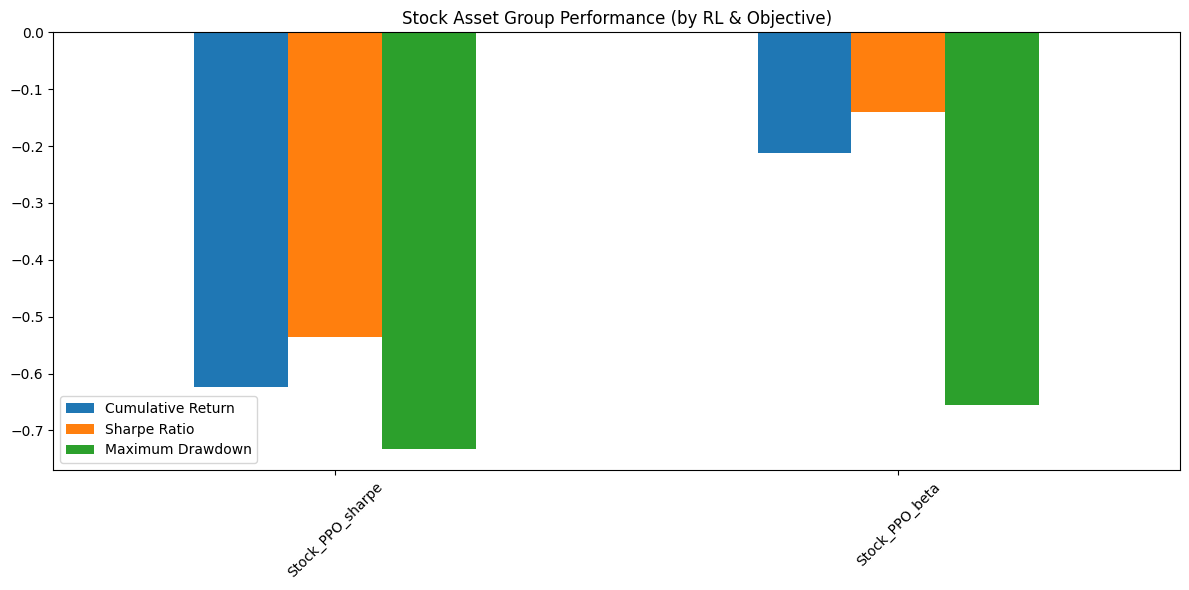

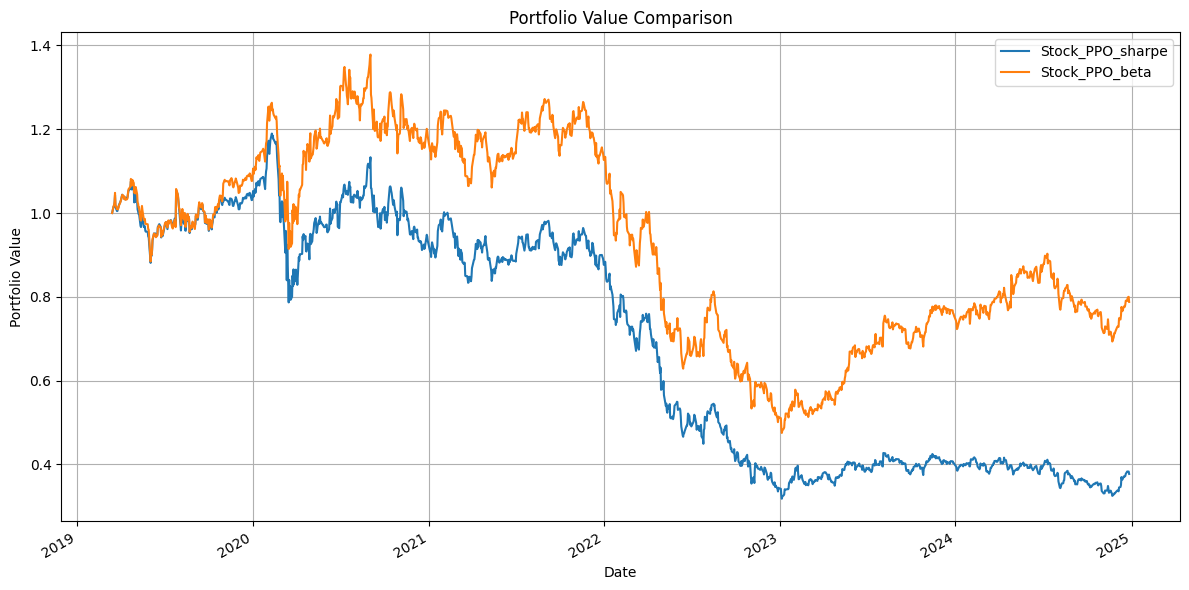

In [ ]:
import gym
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from gym import spaces
from stable_baselines3 import PPO, SAC, TD3
from stable_baselines3.common.vec_env import DummyVecEnv
import torch
import random

# Seed 설정
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)

# 자산군 설정
stock_assets = ["AAPL", "MSFT", "GOOGL", "AMZN"]

# 데이터 수집 함수 (수정: 결측치 처리 강화)
def fetch_data(assets, start="2019-01-01", end="2024-12-31"):
    data = yf.download(assets, start=start, end=end)["Close"]
    price = data.ffill().bfill().dropna()  # 결측치 처리
    returns = price.pct_change().dropna()
    momentum = price.pct_change(20).dropna()
    volatility = returns.rolling(20).std().dropna()
    factors = pd.concat([momentum.add_suffix("_mom"), volatility.add_suffix("_vol")], axis=1).dropna()
    # 인덱스 정렬
    idx = price.index.intersection(factors.index).intersection(returns.index)
    return price.loc[idx], returns.loc[idx], factors.loc[idx]

# 강화학습 환경 (거래 로직 및 보상 계산 수정)
class PPOPortfolioEnv(gym.Env):
    def __init__(self, returns, factors, price, objective="sharpe"):
        super().__init__()
        self.returns = returns
        self.factors = factors
        self.price = price
        self.assets = returns.columns.tolist()
        self.n_assets = len(self.assets)
        self.window = 30
        self.current_step = self.window
        self.cash = 1.0
        self.asset_quantity = np.zeros(self.n_assets)
        self.portfolio_value = [1.0]
        self.portfolio_returns = []
        self.objective = objective
        self.action_space = spaces.Box(low=0, high=1, shape=(self.n_assets,), dtype=np.float32)
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf,
                                            shape=(self.window, factors.shape[1]), dtype=np.float32)

    def reset(self):
        self.current_step = self.window
        self.cash = 1.0
        self.asset_quantity = np.zeros(self.n_assets)
        self.portfolio_value = [1.0]
        self.portfolio_returns = []
        return self.factors.iloc[self.current_step - self.window:self.current_step].values

    def step(self, action):
        action = np.clip(action, 0, 1)
        action = action / (np.sum(action) + 1e-8)  # 포트폴리오 가중치 정규화

        # 현재 가격 및 포트폴리오 가치
        price_today = self.price.iloc[self.current_step].values
        total_value = self.cash + np.sum(self.asset_quantity * price_today)

        # 목표 자산 가치 계산
        desired_value = action * total_value
        current_value = self.asset_quantity * price_today
        trade_value = desired_value - current_value

        # 거래 비용 (0.1% 수수료)
        cost = np.sum(np.abs(trade_value)) * 0.001
        net_trade_value = trade_value - np.sign(trade_value) * cost / self.n_assets

        # 자산 및 현금 업데이트
        self.asset_quantity += net_trade_value / price_today
        self.cash = total_value - np.sum(self.asset_quantity * price_today) - cost

        # 다음 스텝의 포트폴리오 가치 계산
        price_next = self.price.iloc[self.current_step + 1].values
        port_value_next = self.cash + np.sum(self.asset_quantity * price_next)
        port_return = (port_value_next - total_value) / total_value

        self.portfolio_returns.append(port_return)
        self.portfolio_value.append(port_value_next)
        self.current_step += 1

        # 종료 조건 확인
        done = self.current_step >= len(self.returns) - 2

        # 관측값 업데이트
        obs = self.factors.iloc[self.current_step - self.window:self.current_step].values

        # 보상 계산
        if self.objective == "sharpe":
            if len(self.portfolio_returns) > 1:
                returns_window = np.array(self.portfolio_returns[-30:])
                reward = np.mean(returns_window) / (np.std(returns_window) + 1e-6)
            else:
                reward = 0
        elif self.objective == "beta":
            beta_scores = self.factors.iloc[self.current_step - 1][[a+"_mom" for a in self.assets]].values
            reward = np.dot(action, beta_scores)
        elif self.objective == "hybrid":
            if len(self.portfolio_returns) > 1:
                returns_window = np.array(self.portfolio_returns[-30:])
                sharpe = np.mean(returns_window) / (np.std(returns_window) + 1e-6)
            else:
                sharpe = 0
            beta_scores = self.factors.iloc[self.current_step - 1][[a+"_mom" for a in self.assets]].values
            beta = np.dot(action, beta_scores)
            reward = 0.5 * sharpe + 0.5 * beta
        else:
            reward = port_return

        return obs, reward, done, {"portfolio_value": port_value_next}

# 훈련 및 평가 함수 (수정: 평가 환경 개선)
def train_and_evaluate(assets, algo_class, objective="sharpe"):
    price, returns, factors = fetch_data(assets)
    env = DummyVecEnv([lambda: PPOPortfolioEnv(returns, factors, price, objective)])
    model = algo_class("MlpPolicy", env, verbose=0, seed=SEED)
    model.learn(total_timesteps=50000)

    # 평가
    env_eval = PPOPortfolioEnv(returns, factors, price, objective)
    obs = env_eval.reset()
    values = [env_eval.portfolio_value[0]]
    done = False

    while not done:
        action, _ = model.predict(obs)
        obs, reward, done, info = env_eval.step(action)
        values.append(info["portfolio_value"])

    index = price.index[env_eval.window:env_eval.window + len(values)]
    return pd.Series(values, index=index)

# 성과 지표 계산 (수정: 올바른 연간화 계산)
def performance_metrics(series):
    returns = series.pct_change().dropna()
    n_days = len(returns)

    cumulative_return = series.iloc[-1] / series.iloc[0] - 1
    annualized_return = (1 + cumulative_return) ** (252 / n_days) - 1
    annualized_vol = returns.std() * np.sqrt(252)
    sharpe = annualized_return / (annualized_vol + 1e-6)

    downside_returns = returns[returns < 0]
    downside_vol = downside_returns.std() * np.sqrt(252) if len(downside_returns) > 1 else 0
    sortino = annualized_return / (downside_vol + 1e-6)

    peak = series.cummax()
    drawdown = (series - peak) / peak
    mdd = drawdown.min()

    return {
        "Sharpe Ratio": sharpe,
        "Sortino Ratio": sortino,
        "Cumulative Return": cumulative_return,
        "Annualized Return": annualized_return,
        "Annualized Volatility": annualized_vol,
        "Maximum Drawdown": mdd
    }

# 실험 구성
experiments = [
    ("Stock", stock_assets, "PPO", PPO, "sharpe"),
    ("Stock", stock_assets, "PPO", PPO, "beta"),
    #("Stock", stock_assets, "PPO", PPO, "hybrid"),
    #("Stock", stock_assets, "SAC", SAC, "sharpe"),
    #("Stock", stock_assets, "SAC", SAC, "beta"),
    #("Stock", stock_assets, "SAC", SAC, "hybrid"),
    #("Stock", stock_assets, "TD3", TD3, "sharpe"),
    #("Stock", stock_assets, "TD3", TD3, "beta"),
    #("Stock", stock_assets, "TD3", TD3, "hybrid")
]

# 실험 실행
results = {}
for group, assets, algo_name, algo_class, objective in experiments:
    key = f"{group}_{algo_name}_{objective}"
    print(f"▶ Running: {key}")
    try:
        results[key] = train_and_evaluate(assets, algo_class, objective)
    except Exception as e:
        print(f"Error in {key}: {str(e)}")
        results[key] = None

# 성과 요약 (오류 제외)
valid_results = {k: v for k, v in results.items() if v is not None}
metrics_table = pd.DataFrame({k: performance_metrics(v) for k, v in valid_results.items()}).T
print(metrics_table)

# 성과 막대그래프
metrics_table[["Cumulative Return", "Sharpe Ratio", "Maximum Drawdown"]].plot(
    kind="bar", figsize=(12, 6), title="Stock Asset Group Performance (by RL & Objective)"
)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 포트폴리오 가치 시계열 그래프
results_df = pd.DataFrame(valid_results)
results_df.plot(figsize=(12, 6), title="Portfolio Value Comparison")
plt.xlabel("Date")
plt.ylabel("Portfolio Value")
plt.grid(True)
plt.tight_layout()
plt.show()

[                       0%                       ]

['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'BTC-USD', 'ETH-USD', 'BNB-USD', 'SOL-USD']
▶ Running: Mixed_PPO_sharpe


[*********************100%***********************]  8 of 8 completed
/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(
[************          25%                       ]  2 of 8 completed

▶ Running: Mixed_PPO_beta


[*********************100%***********************]  8 of 8 completed
/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(
[                       0%                       ]

▶ Running: Mixed_PPO_hybrid


[*********************100%***********************]  8 of 8 completed
/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(
[******************    38%                       ]  3 of 8 completed

▶ Running: Mixed_SAC_sharpe


[*********************100%***********************]  8 of 8 completed
/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/buffers.py:242: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 11.56GB > 11.06GB
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(
[******************    38%                       ]  3 of 8 completed

▶ Running: Mixed_SAC_beta


[*********************100%***********************]  8 of 8 completed
/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/buffers.py:242: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 11.56GB > 10.43GB
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(
[************          25%                       ]  2 of 8 completed

▶ Running: Mixed_SAC_hybrid


[*********************100%***********************]  8 of 8 completed
/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/buffers.py:242: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 11.56GB > 10.42GB
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(
<ipython-input-8-2708501061>:250: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer k

                  Sharpe Ratio  Sortino Ratio  Cumulative Return  \
Mixed_PPO_sharpe      0.930008       1.306079           8.804896   
Mixed_PPO_beta        0.207582       0.283399           0.870811   
Mixed_PPO_hybrid      0.786536       1.078403           6.340639   
Mixed_SAC_sharpe      3.507346       5.173971         233.539589   
Mixed_SAC_beta        1.131271       1.469760          17.465683   
Mixed_SAC_hybrid      2.327748       3.101688         104.718847   

                  Annualized Return  Annualized Volatility      CAGR  \
Mixed_PPO_sharpe           0.422011               0.453771  0.422011   
Mixed_PPO_beta             0.101421               0.488580  0.101421   
Mixed_PPO_hybrid           0.359928               0.457610  0.359928   
Mixed_SAC_sharpe           1.320285               0.376433  1.320285   
Mixed_SAC_beta             0.567842               0.501950  0.567842   
Mixed_SAC_hybrid           1.051967               0.451924  1.051967   

                  

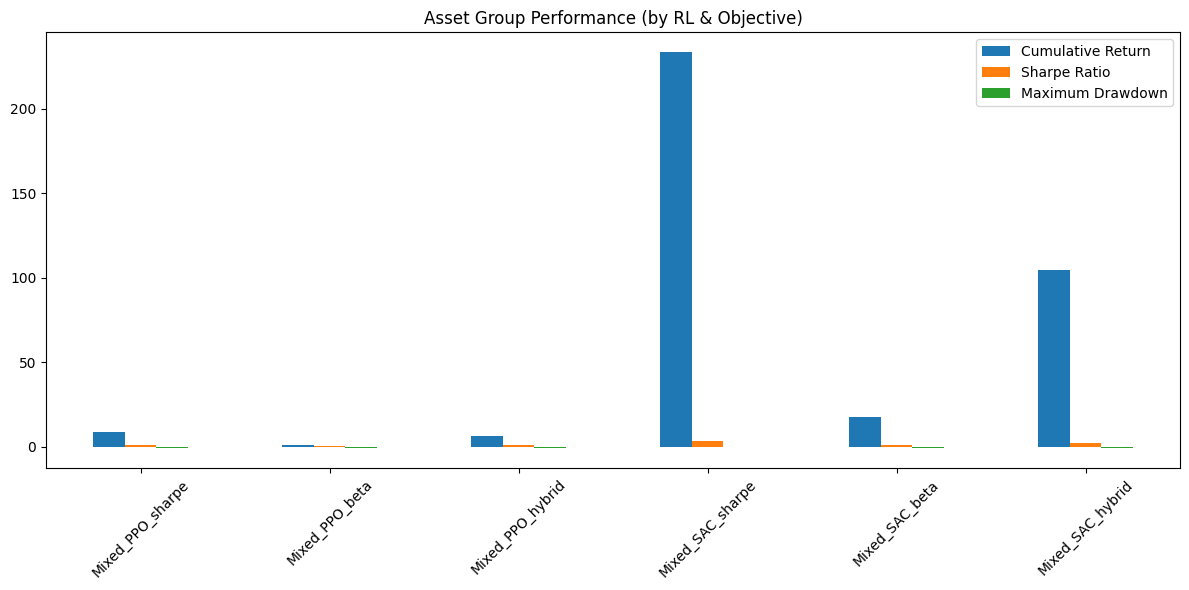

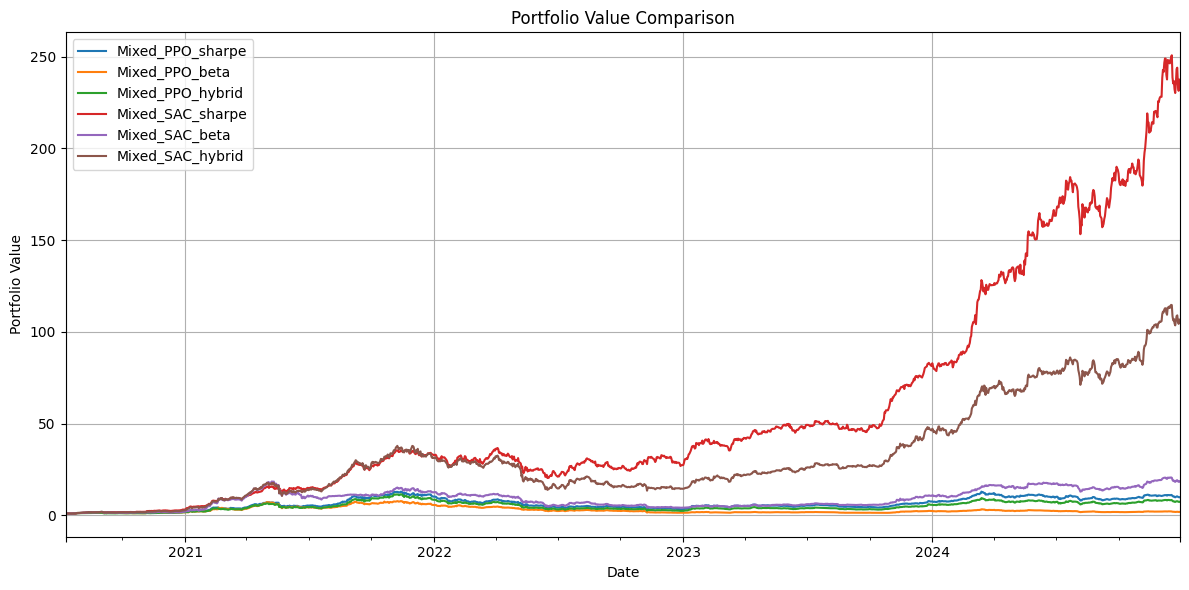


🔎 [Mixed_PPO_sharpe vs Mixed_PPO_beta]
▶ t-test p-value: 0.3598 → 유의미하지 않음
▶ Mann–Whitney U-test p-value: 0.4659 → 유의미하지 않음

🔎 [Mixed_PPO_sharpe vs Mixed_PPO_hybrid]
▶ t-test p-value: 0.8660 → 유의미하지 않음
▶ Mann–Whitney U-test p-value: 0.9737 → 유의미하지 않음

🔎 [Mixed_SAC_sharpe vs Mixed_SAC_beta]
▶ t-test p-value: 0.1715 → 유의미하지 않음
▶ Mann–Whitney U-test p-value: 0.1151 → 유의미하지 않음

🔎 [Mixed_SAC_sharpe vs Mixed_SAC_hybrid]
▶ t-test p-value: 0.6945 → 유의미하지 않음
▶ Mann–Whitney U-test p-value: 0.7834 → 유의미하지 않음
   Group Algorithm CompareWith       t_p       u_p
0  Mixed       PPO        beta  0.359792  0.465900
1  Mixed       PPO      hybrid  0.865965  0.973739
2  Mixed       SAC        beta  0.171527  0.115056
3  Mixed       SAC      hybrid  0.694483  0.783423


In [ ]:
import gym
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from gym import spaces
from stable_baselines3 import PPO, SAC, TD3
from stable_baselines3.common.vec_env import DummyVecEnv
import torch
import random
from sklearn.linear_model import LinearRegression  # 추가
from scipy.stats import ttest_ind, mannwhitneyu


# Seed 설정
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)

# 자산군 설정
stock_assets = ["AAPL", "MSFT", "GOOGL", "AMZN"]
crypto_assets = ["BTC-USD", "ETH-USD", "BNB-USD", "SOL-USD"]
mixed_assets = stock_assets + crypto_assets #["BTC-USD", "ETH-USD", "AAPL", "MSFT", "GOOGL", "AMZN", "BNB-USD", "SOL-USD"]

print(mixed_assets)

def compare_strategies(series1, series2, label1="A", label2="B"):
    """
    두 포트폴리오 가치 시계열에 대해 t-test와 Mann–Whitney U-test 수행
    """
    returns1 = series1.pct_change().dropna()
    returns2 = series2.pct_change().dropna()

    # 길이 맞추기
    min_len = min(len(returns1), len(returns2))
    returns1 = returns1[-min_len:]
    returns2 = returns2[-min_len:]

    # 평균차이 검정 (t-test)
    t_stat, t_p = ttest_ind(returns1, returns2, equal_var=False)

    # 비모수 검정 (Mann–Whitney U-test)
    u_stat, u_p = mannwhitneyu(returns1, returns2, alternative='two-sided')

    print(f"\n🔎 [{label1} vs {label2}]")
    print(f"▶ t-test p-value: {t_p:.4f} → {'유의미함' if t_p < 0.05 else '유의미하지 않음'}")
    print(f"▶ Mann–Whitney U-test p-value: {u_p:.4f} → {'유의미함' if u_p < 0.05 else '유의미하지 않음'}")

    return {
        "t_p": t_p,
        "u_p": u_p
    }


# 시간가변 베타 계산 함수 (추가)
def compute_rolling_beta(price_data: pd.DataFrame, volume_data: pd.DataFrame, window: int = 60) -> pd.DataFrame:
    """
    기술적 요인(Momentum, Volatility, MA Deviation, Volume Z-score)을 이용해
    각 자산별 60일 롤링 회귀를 수행하고, 시간가변적 베타 계수를 계산합니다.
    """
    log_return = np.log(price_data / price_data.shift(1))
    momentum = price_data.pct_change(20)
    volatility = log_return.rolling(20).std()
    ma = price_data.rolling(20).mean()
    ma_deviation = (price_data - ma) / ma
    volume_z = (volume_data - volume_data.rolling(30).mean()) / volume_data.rolling(30).std()

    beta_data = {}
    for asset in price_data.columns:
        asset_df = pd.DataFrame({
            "y": log_return[asset],
            "momentum": momentum[asset],
            "volatility": volatility[asset],
            "ma_dev": ma_deviation[asset],
            "volume_z": volume_z[asset]
        }).dropna()

        betas = []
        index_list = []
        for i in range(window, len(asset_df)):
            y = asset_df["y"].iloc[i - window:i].values
            X = asset_df[["momentum", "volatility", "ma_dev", "volume_z"]].iloc[i - window:i].values
            if np.any(np.isnan(X)) or np.any(np.isnan(y)):
                betas.append([np.nan]*4)
                index_list.append(asset_df.index[i])
                continue
            reg = LinearRegression().fit(X, y)
            betas.append(reg.coef_)
            index_list.append(asset_df.index[i])

        beta_df = pd.DataFrame(betas, columns=["beta_mom", "beta_vol", "beta_ma", "beta_volz"], index=index_list)
        beta_data[asset] = beta_df

    beta_panel = pd.concat(beta_data, axis=1)
    beta_panel.index.name = "Date"
    return beta_panel

# 데이터 수집 함수 (수정: 거래량 데이터 추가 및 베타 통합)
def fetch_data(assets, start="2019-01-01", end="2024-12-31"):
    # 전체 데이터 다운로드 (종가 + 거래량)
    data = yf.download(assets, start=start, end=end)
    price = data["Close"].ffill().bfill().dropna()
    volume = data["Volume"].ffill().bfill().dropna()

    # 기존 팩터 계산
    returns = price.pct_change().dropna()
    momentum = price.pct_change(20).dropna()
    volatility = returns.rolling(20).std().dropna()
    factors = pd.concat([momentum.add_suffix("_mom"), volatility.add_suffix("_vol")], axis=1).dropna()

    # 시간가변 베타 계산 (추가)
    beta_df = compute_rolling_beta(price, volume)

    # 팩터와 베타 통합
    combined_factors = pd.concat([factors, beta_df], axis=1).dropna()

    # 인덱스 정렬
    idx = price.index.intersection(combined_factors.index).intersection(returns.index)
    return price.loc[idx], returns.loc[idx], combined_factors.loc[idx]

    # 기술통계 요약 출력
    if show_summary:
        print("\n[기술통계 요약: Price]")
        print(price.loc[idx].describe().T.round(4))

        print("\n[기술통계 요약: Returns]")
        print(returns.loc[idx].describe().T.round(4))

        print("\n[기술통계 요약: Factors (Momentum, Volatility, Beta 등)]")
        print(combined_factors.loc[idx].describe().T.round(4))

    return price.loc[idx], returns.loc[idx], combined_factors.loc[idx]

# 강화학습 환경 (보상 계산 로직 수정: 베타 팩터 활용)
class PPOPortfolioEnv(gym.Env):
    def __init__(self, returns, factors, price, objective="sharpe"):
        super().__init__()
        self.returns = returns
        self.factors = factors
        self.price = price
        self.assets = returns.columns.tolist()
        self.n_assets = len(self.assets)
        self.window = 30
        self.current_step = self.window
        self.cash = 1.0
        self.asset_quantity = np.zeros(self.n_assets)
        self.portfolio_value = [1.0]
        self.portfolio_returns = []
        self.objective = objective
        self.action_space = spaces.Box(low=0, high=1, shape=(self.n_assets,), dtype=np.float32)

        # 상태 공간 크기 자동 조정 (베타 팩터 추가로 인해)
        self.observation_space = spaces.Box(
            low=-np.inf, high=np.inf,
            shape=(self.window, factors.shape[1]),
            dtype=np.float32
        )

    def reset(self):
        self.current_step = self.window
        self.cash = 1.0
        self.asset_quantity = np.zeros(self.n_assets)
        self.portfolio_value = [1.0]
        self.portfolio_returns = []
        return self.factors.iloc[self.current_step - self.window:self.current_step].values

    def step(self, action):
        action = np.clip(action, 0, 1)
        action = action / (np.sum(action) + 1e-8)  # 포트폴리오 가중치 정규화

        # 현재 가격 및 포트폴리오 가치
        price_today = self.price.iloc[self.current_step].values
        total_value = self.cash + np.sum(self.asset_quantity * price_today)

        # 목표 자산 가치 계산
        desired_value = action * total_value
        current_value = self.asset_quantity * price_today
        trade_value = desired_value - current_value

        # 거래 비용 (0.1% 수수료)
        cost = np.sum(np.abs(trade_value)) * 0.001
        net_trade_value = trade_value - np.sign(trade_value) * cost / self.n_assets

        # 자산 및 현금 업데이트
        self.asset_quantity += net_trade_value / price_today
        self.cash = total_value - np.sum(self.asset_quantity * price_today) - cost

        # 다음 스텝의 포트폴리오 가치 계산
        price_next = self.price.iloc[self.current_step + 1].values
        port_value_next = self.cash + np.sum(self.asset_quantity * price_next)
        port_return = (port_value_next - total_value) / total_value

        self.portfolio_returns.append(port_return)
        self.portfolio_value.append(port_value_next)
        self.current_step += 1

        # 종료 조건 확인
        done = self.current_step >= len(self.returns) - 2

        # 관측값 업데이트
        obs = self.factors.iloc[self.current_step - self.window:self.current_step].values

        # 보상 계산 (베타 팩터 활용 방식 수정)
        if self.objective == "sharpe":
            if len(self.portfolio_returns) > 1:
                returns_window = np.array(self.portfolio_returns[-30:])
                reward = np.mean(returns_window) / (np.std(returns_window) + 1e-6)
            else:
                reward = 0
        elif self.objective == "beta":
            # 베타 팩터 선택 (4개 팩터 중 모멘텀 베타 사용)
            beta_scores = []
            for asset in self.assets:
                # 각 자산별 beta_mom 값 선택
                beta_mom = self.factors.iloc[self.current_step - 1].get((asset, 'beta_mom'), 0)
                beta_scores.append(beta_mom)
            reward = np.dot(action, np.array(beta_scores))
        elif self.objective == "hybrid":
            if len(self.portfolio_returns) > 1:
                returns_window = np.array(self.portfolio_returns[-30:])
                sharpe = np.mean(returns_window) / (np.std(returns_window) + 1e-6)
            else:
                sharpe = 0

            # 베타 팩터 선택 (4개 팩터 중 모멘텀 베타 사용)
            beta_scores = []
            for asset in self.assets:
                beta_mom = self.factors.iloc[self.current_step - 1].get((asset, 'beta_mom'), 0)
                beta_scores.append(beta_mom)
            beta = np.dot(action, np.array(beta_scores))
            reward = 0.5 * sharpe + 0.5 * beta
        else:
            reward = port_return

        return obs, reward, done, {"portfolio_value": port_value_next}

# 훈련 및 평가 함수 (수정: 평가 환경 개선)
def train_and_evaluate(assets, algo_class, objective="sharpe"):
    price, returns, factors = fetch_data(assets)
    env = DummyVecEnv([lambda: PPOPortfolioEnv(returns, factors, price, objective)])
    model = algo_class("MlpPolicy", env, verbose=0, seed=SEED)
    model.learn(total_timesteps=50000)

    # 평가
    env_eval = PPOPortfolioEnv(returns, factors, price, objective)
    obs = env_eval.reset()
    values = [env_eval.portfolio_value[0]]
    done = False

    while not done:
        action, _ = model.predict(obs)
        obs, reward, done, info = env_eval.step(action)
        values.append(info["portfolio_value"])

    index = price.index[env_eval.window:env_eval.window + len(values)]
    return pd.Series(values, index=index)

# 성과 지표 계산 (수정: 올바른 연간화 계산)
# 성과 지표 계산
def performance_metrics(series):
    returns = series.pct_change().dropna()
    cumulative_return = series[-1] / series[0] - 1
    annualized_return = (series[-1] / series[0]) ** (252 / len(series)) - 1
    annualized_vol = returns.std() * np.sqrt(252)
    cagr = (series[-1] / series[0]) ** (252 / len(series)) - 1
    annualized_vol = returns.std() * np.sqrt(252)
    sharpe = (cagr - 0.0) / (annualized_vol + 1e-6)
    downside_std = returns[returns < 0].std() * np.sqrt(252)
    sortino = (cagr - 0.0) / (downside_std + 1e-6)
    peak = series.cummax()
    drawdown = (series - peak) / peak
    mdd = drawdown.min()
    turnover = (np.abs(returns).sum()) / len(returns)
    return {
        "Sharpe Ratio": sharpe,
        "Sortino Ratio": sortino,
        "Cumulative Return": cumulative_return,
        "Annualized Return": cagr,
        "Annualized Volatility": annualized_vol,
        "CAGR": cagr,
        "Maximum Drawdown": mdd,
        "Turnover Ratio": turnover
    }


# 실험 구성
experiments = [
    #("Crypto", crypto_assets, "PPO", PPO, "sharpe"),
    #("Crypto", crypto_assets, "PPO", PPO, "beta"),
    #("Crypto", crypto_assets, "PPO", PPO, "hybrid"),
    #("Crypto", crypto_assets, "SAC", SAC, "sharpe"),
    #("Crypto", crypto_assets, "SAC", SAC, "beta"),
    #("Crypto", crypto_assets, "SAC", SAC, "hybrid"),
    #("Crypto", crypto_assets, "TD3", TD3, "sharpe"),
    #("Crypto", crypto_assets, "TD3", TD3, "beta"),
    #("Crypto", crypto_assets, "TD3", TD3, "hybrid"),

    #("Stock", stock_assets, "PPO", PPO, "sharpe"),
    #("Stock", stock_assets, "PPO", PPO, "beta"),
    #("Stock", stock_assets, "PPO", PPO, "hybrid"),
    #("Stock", stock_assets, "SAC", SAC, "sharpe"),
    #("Stock", stock_assets, "SAC", SAC, "beta"),
    #("Stock", stock_assets, "SAC", SAC, "hybrid"),
    #("Stock", stock_assets, "TD3", TD3, "sharpe"),
    #("Stock", stock_assets, "TD3", TD3, "beta"),
    #("Stock", stock_assets, "TD3", TD3, "hybrid"),

    ("Mixed", mixed_assets, "PPO", PPO, "sharpe"),
    ("Mixed", mixed_assets, "PPO", PPO, "beta"),
    ("Mixed", mixed_assets, "PPO", PPO, "hybrid"),
    ("Mixed", mixed_assets, "SAC", SAC, "sharpe"),
    ("Mixed", mixed_assets, "SAC", SAC, "beta"),
    ("Mixed", mixed_assets, "SAC", SAC, "hybrid"),
    #("Mixed", mixed_assets, "TD3", TD3, "sharpe"),
    #("Mixed", mixed_assets, "TD3", TD3, "beta"),
    #("Mixed", mixed_assets, "TD3", TD3, "hybrid"),
]

# 실험 실행
results = {}
for group, assets, algo_name, algo_class, objective in experiments:
    key = f"{group}_{algo_name}_{objective}"
    print(f"▶ Running: {key}")
    try:
        results[key] = train_and_evaluate(assets, algo_class, objective)
    except Exception as e:
        print(f"Error in {key}: {str(e)}")
        results[key] = None

# 성과 요약 (오류 제외)
valid_results = {k: v for k, v in results.items() if v is not None}
metrics_table = pd.DataFrame({k: performance_metrics(v) for k, v in valid_results.items()}).T
print(metrics_table)

# 성과 막대그래프
metrics_table[["Cumulative Return", "Sharpe Ratio", "Maximum Drawdown"]].plot(
    kind="bar", figsize=(12, 6), title="Asset Group Performance (by RL & Objective)"
)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 포트폴리오 가치 시계열 그래프
results_df = pd.DataFrame(valid_results)
results_df.plot(figsize=(12, 6), title="Portfolio Value Comparison")
plt.xlabel("Date")
plt.ylabel("Portfolio Value")
plt.grid(True)
plt.tight_layout()
plt.show()


# sharpe 를 baseline으로 하여 통계적으로 의미가 있는지 비교함
summary = []

for (group, assets, algo, model_cls, obj) in experiments:
    if obj == "sharpe":
        continue  # baseline 제외

    base_key = f"{group}_{algo}_sharpe"
    compare_key = f"{group}_{algo}_{obj}"

    if base_key in results and compare_key in results:
        res = compare_strategies(results[base_key], results[compare_key], label1=base_key, label2=compare_key)
        summary.append({
            "Group": group,
            "Algorithm": algo,
            "CompareWith": obj,
            "t_p": res["t_p"],
            "u_p": res["u_p"]
        })

summary_df = pd.DataFrame(summary)
#import ace_tools as tools; tools.display_dataframe_to_user(name="Comparison Results", dataframe=summary_df)
print(summary_df)


In [ ]:
!pip install shimmy>=0.2.1

In [ ]:
!pip install stable-baselines3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.5/184.5 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 73.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 59.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 104.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [ ]:
pip install PyPortfolioOpt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.1/220.1 kB 21.4 MB/s eta 0:00:00


Crypto

In [ ]:
import gym
import numpy as np
import pandas as pd
import yfinance as yf

import matplotlib.pyplot as plt
from gym import spaces
from stable_baselines3 import PPO, SAC, TD3
from stable_baselines3.common.vec_env import DummyVecEnv
import torch
import random
from sklearn.linear_model import LinearRegression  # 추가
from scipy.stats import ttest_ind, mannwhitneyu

from pypfopt import expected_returns, risk_models
from pypfopt.efficient_frontier import EfficientFrontier



# Seed 설정
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)

show_summary = True

# 자산군 설정
stock_assets = ["AAPL", "MSFT", "GOOGL", "AMZN"]
crypto_assets = ["BTC-USD", "ETH-USD", "BNB-USD", "SOL-USD"]
mixed_assets = stock_assets + crypto_assets #["BTC-USD", "ETH-USD", "AAPL", "MSFT", "GOOGL", "AMZN", "BNB-USD", "SOL-USD"]

print(mixed_assets)

def compare_strategies(series1, series2, label1="A", label2="B"):
    """
    두 포트폴리오 가치 시계열에 대해 t-test와 Mann–Whitney U-test 수행
    """
    returns1 = series1.pct_change().dropna()
    returns2 = series2.pct_change().dropna()

    # 길이 맞추기
    min_len = min(len(returns1), len(returns2))
    returns1 = returns1[-min_len:]
    returns2 = returns2[-min_len:]

    # 평균차이 검정 (t-test)
    t_stat, t_p = ttest_ind(returns1, returns2, equal_var=False)

    # 비모수 검정 (Mann–Whitney U-test)
    u_stat, u_p = mannwhitneyu(returns1, returns2, alternative='two-sided')

    print(f"\n🔎 [{label1} vs {label2}]")
    print(f"▶ t-test p-value: {t_p:.4f} → {'유의미함' if t_p < 0.05 else '유의미하지 않음'}")
    print(f"▶ Mann–Whitney U-test p-value: {u_p:.4f} → {'유의미함' if u_p < 0.05 else '유의미하지 않음'}")

    return {
        "t_p": t_p,
        "u_p": u_p
    }


# 시간가변 베타 계산 함수 (추가)
def compute_rolling_beta(price_data: pd.DataFrame, volume_data: pd.DataFrame, window: int = 60) -> pd.DataFrame:
    """
    기술적 요인(Momentum, Volatility, MA Deviation, Volume Z-score)을 이용해
    각 자산별 60일 롤링 회귀를 수행하고, 시간가변적 베타 계수를 계산합니다.
    """
    log_return = np.log(price_data / price_data.shift(1))
    momentum = price_data.pct_change(20)
    volatility = log_return.rolling(20).std()
    ma = price_data.rolling(20).mean()
    ma_deviation = (price_data - ma) / ma
    volume_z = (volume_data - volume_data.rolling(30).mean()) / volume_data.rolling(30).std()

    beta_data = {}
    for asset in price_data.columns:
        asset_df = pd.DataFrame({
            "y": log_return[asset],
            "momentum": momentum[asset],
            "volatility": volatility[asset],
            "ma_dev": ma_deviation[asset],
            "volume_z": volume_z[asset]
        }).dropna()

        betas = []
        index_list = []
        for i in range(window, len(asset_df)):
            y = asset_df["y"].iloc[i - window:i].values
            X = asset_df[["momentum", "volatility", "ma_dev", "volume_z"]].iloc[i - window:i].values
            if np.any(np.isnan(X)) or np.any(np.isnan(y)):
                betas.append([np.nan]*4)
                index_list.append(asset_df.index[i])
                continue
            reg = LinearRegression().fit(X, y)
            betas.append(reg.coef_)
            index_list.append(asset_df.index[i])

        beta_df = pd.DataFrame(betas, columns=["beta_mom", "beta_vol", "beta_ma", "beta_volz"], index=index_list)
        beta_data[asset] = beta_df

    beta_panel = pd.concat(beta_data, axis=1)
    beta_panel.index.name = "Date"
    return beta_panel

# 데이터 수집 함수 (수정: 거래량 데이터 추가 및 베타 통합)
def fetch_data(assets, start="2019-01-01", end="2024-12-31"):
    # 전체 데이터 다운로드 (종가 + 거래량)
    data = yf.download(assets, start=start, end=end, auto_adjust=True, progress=False, threads=False)
    price = data["Close"].ffill().bfill().dropna()
    volume = data["Volume"].ffill().bfill().dropna()

    # 기존 팩터 계산
    returns = price.pct_change().dropna()
    momentum = price.pct_change(20).dropna()
    volatility = returns.rolling(20).std().dropna()
    factors = pd.concat([momentum.add_suffix("_mom"), volatility.add_suffix("_vol")], axis=1).dropna()

    # 시간가변 베타 계산 (추가)
    beta_df = compute_rolling_beta(price, volume)

    # 팩터와 베타 통합
    combined_factors = pd.concat([factors, beta_df], axis=1).dropna()

    # 인덱스 정렬
    idx = price.index.intersection(combined_factors.index).intersection(returns.index)

    if show_summary:
        # 기술통계 요약 출력
        print("\n[기술통계 요약: Price]")
        print(price.loc[idx].describe().T.round(4))

        print("\n[기술통계 요약: Returns]")
        print(returns.loc[idx].describe().T.round(4))

        print("\n[기술통계 요약: Factors (Momentum, Volatility, Beta 등)]")
        print(combined_factors.loc[idx].describe().T.round(4))

    return price.loc[idx], returns.loc[idx], combined_factors.loc[idx]

# 강화학습 환경 (보상 계산 로직 수정: 베타 팩터 활용)
class PPOPortfolioEnv(gym.Env):
    def __init__(self, returns, factors, price, objective="sharpe"):
        super().__init__()
        self.returns = returns
        self.factors = factors
        self.price = price
        self.assets = returns.columns.tolist()
        self.n_assets = len(self.assets)
        self.window = 30
        self.current_step = self.window
        self.cash = 1.0
        self.asset_quantity = np.zeros(self.n_assets)
        self.portfolio_value = [1.0]
        self.portfolio_returns = []
        self.objective = objective
        self.action_space = spaces.Box(low=0, high=1, shape=(self.n_assets,), dtype=np.float32)

        # 상태 공간 크기 자동 조정 (베타 팩터 추가로 인해)
        self.observation_space = spaces.Box(
            low=-np.inf, high=np.inf,
            shape=(self.window, factors.shape[1]),
            dtype=np.float32
        )

    def reset(self):
        self.current_step = self.window
        self.cash = 1.0
        self.asset_quantity = np.zeros(self.n_assets)
        self.portfolio_value = [1.0]
        self.portfolio_returns = []
        return self.factors.iloc[self.current_step - self.window:self.current_step].values

    def step(self, action):
        action = np.clip(action, 0, 1)
        action = action / (np.sum(action) + 1e-8)  # 포트폴리오 가중치 정규화

        # 현재 가격 및 포트폴리오 가치
        price_today = self.price.iloc[self.current_step].values
        total_value = self.cash + np.sum(self.asset_quantity * price_today)

        # 목표 자산 가치 계산
        desired_value = action * total_value
        current_value = self.asset_quantity * price_today
        trade_value = desired_value - current_value

        # 거래 비용 (0.1% 수수료)
        cost = np.sum(np.abs(trade_value)) * 0.001
        net_trade_value = trade_value - np.sign(trade_value) * cost / self.n_assets

        # 자산 및 현금 업데이트
        self.asset_quantity += net_trade_value / price_today
        self.cash = total_value - np.sum(self.asset_quantity * price_today) - cost

        # 다음 스텝의 포트폴리오 가치 계산
        price_next = self.price.iloc[self.current_step + 1].values
        port_value_next = self.cash + np.sum(self.asset_quantity * price_next)
        port_return = (port_value_next - total_value) / total_value

        self.portfolio_returns.append(port_return)
        self.portfolio_value.append(port_value_next)
        self.current_step += 1

        # 종료 조건 확인
        done = self.current_step >= len(self.returns) - 2

        # 관측값 업데이트
        obs = self.factors.iloc[self.current_step - self.window:self.current_step].values

        # 보상 계산 (베타 팩터 활용 방식 수정)
        if self.objective == "sharpe":
            if len(self.portfolio_returns) > 1:
                returns_window = np.array(self.portfolio_returns[-30:])
                reward = np.mean(returns_window) / (np.std(returns_window) + 1e-6)
            else:
                reward = 0
        elif self.objective == "beta":
            # 베타 팩터 선택 (4개 팩터 중 모멘텀 베타 사용)
            beta_scores = []
            for asset in self.assets:
                # 각 자산별 beta_mom 값 선택
                beta_mom = self.factors.iloc[self.current_step - 1].get((asset, 'beta_mom'), 0)
                beta_scores.append(beta_mom)
            reward = np.dot(action, np.array(beta_scores))
        elif self.objective == "multi_beta":
            beta_scores = []
            for asset in self.assets:
                beta_total = 0
                for factor_name in ["beta_mom", "beta_vol", "beta_ma_dev", "beta_vol_z"]:
                    beta_val = self.factors.iloc[self.current_step - 1].get((asset, factor_name), 0)
                    beta_total += beta_val
                beta_scores.append(beta_total / 4.0)  # 평균 또는 weighted average 가능
            reward = np.dot(action, np.array(beta_scores))
        elif self.objective == "hybrid":
            if len(self.portfolio_returns) > 1:
                returns_window = np.array(self.portfolio_returns[-30:])
                sharpe = np.mean(returns_window) / (np.std(returns_window) + 1e-6)
            else:
                sharpe = 0

            # 베타 팩터 선택 (4개 팩터 중 모멘텀 베타 사용)
            beta_scores = []
            for asset in self.assets:
                beta_mom = self.factors.iloc[self.current_step - 1].get((asset, 'beta_mom'), 0)
                beta_scores.append(beta_mom)
            beta = np.dot(action, np.array(beta_scores))
            reward = 0.5 * sharpe + 0.5 * beta
        elif self.objective == "multi_hybrid":
            if len(self.portfolio_returns) > 1:
                returns_window = np.array(self.portfolio_returns[-30:])
                sharpe = np.mean(returns_window) / (np.std(returns_window) + 1e-6)
            else:
                sharpe = 0

            # 베타 팩터 선택 (4개 팩터 베타 사용)
            beta_scores = []
            for asset in self.assets:
                beta_total = 0
                for factor_name in ["beta_mom", "beta_vol", "beta_ma_dev", "beta_vol_z"]:
                    beta_val = self.factors.iloc[self.current_step - 1].get((asset, factor_name), 0)
                    beta_total += beta_val
                beta_scores.append(beta_total / 4.0)  # 평균 또는 weighted average 가능
            beta = np.dot(action, np.array(beta_scores))
            reward = 0.5 * sharpe + 0.5 * beta
        else:
            reward = port_return

        return obs, reward, done, {"portfolio_value": port_value_next}

# 훈련 및 평가 함수 (수정: 평가 환경 개선)
def train_and_evaluate(assets, algo_class, objective="sharpe"):
    price, returns, factors = fetch_data(assets)


    if algo_class == None :
        if objective == "equal_weights":
            price, returns, _ = fetch_data(assets)
            equal_weights = np.ones(len(assets)) / len(assets)
            weighted_returns = returns.dot(equal_weights)
            values = (1 + weighted_returns).cumprod()
            index = price.index[-len(values):]
            return pd.Series(values, index=index)
        elif objective == "mvp":
            price, returns, _ = fetch_data(assets)
            mu = expected_returns.mean_historical_return(price)
            S = risk_models.sample_cov(price)
            ef = EfficientFrontier(mu, S)
            mvp_weights = ef.min_volatility()
            w = np.array([mvp_weights.get(ticker, 0.0) for ticker in assets])
            weighted_returns = returns.dot(w)
            values = (1 + weighted_returns).cumprod()
            index = price.index[-len(values):]
            return pd.Series(values, index=index)
        else:
            return
    else:
        env = DummyVecEnv([lambda: PPOPortfolioEnv(returns, factors, price, objective)])
        model = algo_class("MlpPolicy", env, verbose=0, seed=SEED)
        model.learn(total_timesteps=50000)

        # 평가
        env_eval = PPOPortfolioEnv(returns, factors, price, objective)
        obs = env_eval.reset()
        values = [env_eval.portfolio_value[0]]
        done = False

        while not done:
            action, _ = model.predict(obs)
            obs, reward, done, info = env_eval.step(action)
            values.append(info["portfolio_value"])

        index = price.index[env_eval.window:env_eval.window + len(values)]
        return pd.Series(values, index=index)

# 성과 지표 계산 (수정: 올바른 연간화 계산)
# 성과 지표 계산
def performance_metrics(series):
    returns = series.pct_change().dropna()
    cumulative_return = series.iloc[-1] / series.iloc[0] - 1
    annualized_return = (series.iloc[-1] / series.iloc[0]) ** (252 / len(series)) - 1
    cagr = annualized_return  # 중복 제거
    annualized_vol = returns.std() * np.sqrt(252)
    sharpe = (cagr - 0.0) / (annualized_vol + 1e-6)
    downside_std = returns[returns < 0].std() * np.sqrt(252)
    sortino = (cagr - 0.0) / (downside_std + 1e-6)
    peak = series.cummax()
    drawdown = (series - peak) / peak
    mdd = drawdown.min()
    mdd = drawdown.min()
    if len(returns) == 0:
        turnover = 0.0
    else:
        turnover = (np.abs(returns).sum()) / len(returns)

    return {
        "Sharpe Ratio": sharpe,
        "Sortino Ratio": sortino,
        "Cumulative Return": cumulative_return,
        "Annualized Return": cagr,
        "Annualized Volatility": annualized_vol,
        "CAGR": cagr,
        "Maximum Drawdown": mdd,
        "Turnover Ratio": turnover
    }


# 실험 구성
experiments = [
    ("Crypto", crypto_assets, "EqualWeight", None, "equal_weights"),
    ("Crypto", crypto_assets, "MeanVariance", None, "mvp"),
    ("Crypto", crypto_assets, "PPO", PPO, "sharpe"),
    ("Crypto", crypto_assets, "PPO", PPO, "beta"),
    ("Crypto", crypto_assets, "PPO", PPO, "multi_beta"),
    ("Crypto", crypto_assets, "PPO", PPO, "hybrid"),
    ("Crypto", crypto_assets, "PPO", PPO, "multi_hybrid"),
    ("Crypto", crypto_assets, "SAC", SAC, "sharpe"),
    ("Crypto", crypto_assets, "SAC", SAC, "beta"),
    ("Crypto", crypto_assets, "SAC", SAC, "multi_beta"),
    ("Crypto", crypto_assets, "SAC", SAC, "hybrid"),
    ("Crypto", crypto_assets, "SAC", SAC, "multi_hybrid"),
    ("Crypto", crypto_assets, "TD3", TD3, "sharpe"),
    ("Crypto", crypto_assets, "TD3", TD3, "beta"),
    ("Crypto", crypto_assets, "TD3", TD3, "multi_beta"),
    ("Crypto", crypto_assets, "TD3", TD3, "hybrid"),
    ("Crypto", crypto_assets, "TD3", TD3, "multi_hybrid"),

#    ("Stock", stock_assets, "EqualWeight", None, "equal_weights"),
#    ("Stock", stock_assets, "MeanVariance", None, "mvp"),
#    ("Stock", stock_assets, "PPO", PPO, "sharpe"),
#    ("Stock", stock_assets, "PPO", PPO, "beta"),
#    ("Stock", stock_assets, "PPO", PPO, "multi_beta"),
#    ("Stock", stock_assets, "PPO", PPO, "hybrid"),
#    ("Stock", stock_assets, "PPO", PPO, "multi_hybrid"),
#    ("Stock", stock_assets, "SAC", SAC, "sharpe"),
#    ("Stock", stock_assets, "SAC", SAC, "beta"),
#    ("Stock", stock_assets, "SAC", SAC, "multi_beta"),
#    ("Stock", stock_assets, "SAC", SAC, "hybrid"),
#    ("Stock", stock_assets, "SAC", SAC, "multi_hybrid"),
#    ("Stock", stock_assets, "TD3", TD3, "sharpe"),
#    ("Stock", stock_assets, "TD3", TD3, "beta"),
#    ("Stock", stock_assets, "TD3", TD3, "multi_beta"),
#    ("Stock", stock_assets, "TD3", TD3, "hybrid"),
#    ("Stock", stock_assets, "TD3", TD3, "multi_hybrid"),

#    ("Mixed", mixed_assets, "EqualWeight", None, "equal_weights"),
#    ("Mixed", mixed_assets, "MeanVariance", None, "mvp"),
#    ("Mixed", mixed_assets, "PPO", PPO, "sharpe"),
#    ("Mixed", mixed_assets, "PPO", PPO, "beta"),
#    ("Mixed", mixed_assets, "PPO", PPO, "multi_beta"),
#    ("Mixed", mixed_assets, "PPO", PPO, "hybrid"),
#    ("Mixed", mixed_assets, "PPO", PPO, "multi_hybrid"),

#    ("Mixed", mixed_assets, "SAC", SAC, "sharpe"),
#    ("Mixed", mixed_assets, "SAC", SAC, "beta"),
#    ("Mixed", mixed_assets, "SAC", SAC, "multi_beta"),
#    ("Mixed", mixed_assets, "SAC", SAC, "hybrid"),
#    ("Mixed", mixed_assets, "SAC", SAC, "multi_hybrid"),

#    ("Mixed", mixed_assets, "TD3", TD3, "sharpe"),
#    ("Mixed", mixed_assets, "TD3", TD3, "beta"),
#    ("Mixed", mixed_assets, "TD3", TD3, "multi_beta"),
#    ("Mixed", mixed_assets, "TD3", TD3, "hybrid"),
#    ("Mixed", mixed_assets, "TD3", TD3, "multi_hybrid"),
]

# 실험 실행
results = {}
previous_group = None

for group, assets, algo_name, algo_class, objective in experiments:
    key = f"{group}_{algo_name}_{objective}"
    print(f"▶ Running: {key}")
    try:
        results[key] = train_and_evaluate(assets, algo_class, objective)
    except Exception as e:
        print(f"Error in {key}: {str(e)}")
        results[key] = None
    # 그룹이 바뀔때만 기술통계 출력
    if previous_group != group:
        show_summary = True
        previous_group = group
    else:
        show_summary = False


# 성과 요약 (오류 제외)
valid_results = {k: v for k, v in results.items() if v is not None}
metrics_table = pd.DataFrame({k: performance_metrics(v) for k, v in valid_results.items()}).T
print(metrics_table)

# 성과 막대그래프
metrics_table[["Cumulative Return", "Sharpe Ratio", "Maximum Drawdown"]].plot(
    kind="bar", figsize=(12, 6), title="Asset Group Performance (by RL & Objective)"
)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 포트폴리오 가치 시계열 그래프
results_df = pd.DataFrame(valid_results)
results_df.plot(figsize=(12, 6), title="Portfolio Value Comparison")
plt.xlabel("Date")
plt.ylabel("Portfolio Value")
plt.grid(True)
plt.tight_layout()
plt.show()


# sharpe 를 baseline으로 하여 통계적으로 의미가 있는지 비교함
summary = []

for (group, assets, algo, model_cls, obj) in experiments:
    if obj == "sharpe":
        continue  # baseline 제외

    base_key = f"{group}_{algo}_sharpe"
    compare_key = f"{group}_{algo}_{obj}"

    if base_key in results and compare_key in results:
        res = compare_strategies(results[base_key], results[compare_key], label1=base_key, label2=compare_key)
        summary.append({
            "Group": group,
            "Algorithm": algo,
            "CompareWith": obj,
            "t_p": res["t_p"],
            "u_p": res["u_p"]
        })

summary_df = pd.DataFrame(summary)
#import ace_tools as tools; tools.display_dataframe_to_user(name="Comparison Results", dataframe=summary_df)
print(summary_df)

['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'BTC-USD', 'ETH-USD', 'BNB-USD', 'SOL-USD']
▶ Running: Crypto_EqualWeight_equal_weights

[기술통계 요약: Price]
          count        mean         std        min         25%         50%  \
Ticker                                                                       
BNB-USD  1665.0    334.5481    182.3187    15.1853    239.7069    310.6347   
BTC-USD  1665.0  38987.5909  20112.5706  9045.3906  22978.1172  36276.8047   
ETH-USD  1665.0   2154.8572   1050.1261   222.9598   1552.0895   1961.2808   
SOL-USD  1665.0     70.9860     67.8793     0.5706     19.4937     36.1909   

                75%          max  
Ticker                            
BNB-USD    485.9064     750.2726  
BTC-USD  54529.1445  106140.6016  
ETH-USD   2986.0132    4812.0874  
SOL-USD    133.9919     258.9343  

[기술통계 요약: Returns]
          count    mean     std     min     25%     50%     75%     max
Ticker                                                                 
BNB-USD  1665.0  

/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WA

stock

In [ ]:
import gym
import numpy as np
import pandas as pd
import yfinance as yf

import matplotlib.pyplot as plt
from gym import spaces
from stable_baselines3 import PPO, SAC, TD3
from stable_baselines3.common.vec_env import DummyVecEnv
import torch
import random
from sklearn.linear_model import LinearRegression  # 추가
from scipy.stats import ttest_ind, mannwhitneyu

from pypfopt import expected_returns, risk_models
from pypfopt.efficient_frontier import EfficientFrontier



# Seed 설정
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)

show_summary = True

# 자산군 설정
stock_assets = ["AAPL", "MSFT", "GOOGL", "AMZN"]
crypto_assets = ["BTC-USD", "ETH-USD", "BNB-USD", "SOL-USD"]
mixed_assets = stock_assets + crypto_assets #["BTC-USD", "ETH-USD", "AAPL", "MSFT", "GOOGL", "AMZN", "BNB-USD", "SOL-USD"]

print(mixed_assets)

def compare_strategies(series1, series2, label1="A", label2="B"):
    """
    두 포트폴리오 가치 시계열에 대해 t-test와 Mann–Whitney U-test 수행
    """
    returns1 = series1.pct_change().dropna()
    returns2 = series2.pct_change().dropna()

    # 길이 맞추기
    min_len = min(len(returns1), len(returns2))
    returns1 = returns1[-min_len:]
    returns2 = returns2[-min_len:]

    # 평균차이 검정 (t-test)
    t_stat, t_p = ttest_ind(returns1, returns2, equal_var=False)

    # 비모수 검정 (Mann–Whitney U-test)
    u_stat, u_p = mannwhitneyu(returns1, returns2, alternative='two-sided')

    print(f"\n🔎 [{label1} vs {label2}]")
    print(f"▶ t-test p-value: {t_p:.4f} → {'유의미함' if t_p < 0.05 else '유의미하지 않음'}")
    print(f"▶ Mann–Whitney U-test p-value: {u_p:.4f} → {'유의미함' if u_p < 0.05 else '유의미하지 않음'}")

    return {
        "t_p": t_p,
        "u_p": u_p
    }


# 시간가변 베타 계산 함수 (추가)
def compute_rolling_beta(price_data: pd.DataFrame, volume_data: pd.DataFrame, window: int = 60) -> pd.DataFrame:
    """
    기술적 요인(Momentum, Volatility, MA Deviation, Volume Z-score)을 이용해
    각 자산별 60일 롤링 회귀를 수행하고, 시간가변적 베타 계수를 계산합니다.
    """
    log_return = np.log(price_data / price_data.shift(1))
    momentum = price_data.pct_change(20)
    volatility = log_return.rolling(20).std()
    ma = price_data.rolling(20).mean()
    ma_deviation = (price_data - ma) / ma
    volume_z = (volume_data - volume_data.rolling(30).mean()) / volume_data.rolling(30).std()

    beta_data = {}
    for asset in price_data.columns:
        asset_df = pd.DataFrame({
            "y": log_return[asset],
            "momentum": momentum[asset],
            "volatility": volatility[asset],
            "ma_dev": ma_deviation[asset],
            "volume_z": volume_z[asset]
        }).dropna()

        betas = []
        index_list = []
        for i in range(window, len(asset_df)):
            y = asset_df["y"].iloc[i - window:i].values
            X = asset_df[["momentum", "volatility", "ma_dev", "volume_z"]].iloc[i - window:i].values
            if np.any(np.isnan(X)) or np.any(np.isnan(y)):
                betas.append([np.nan]*4)
                index_list.append(asset_df.index[i])
                continue
            reg = LinearRegression().fit(X, y)
            betas.append(reg.coef_)
            index_list.append(asset_df.index[i])

        beta_df = pd.DataFrame(betas, columns=["beta_mom", "beta_vol", "beta_ma", "beta_volz"], index=index_list)
        beta_data[asset] = beta_df

    beta_panel = pd.concat(beta_data, axis=1)
    beta_panel.index.name = "Date"
    return beta_panel

# 데이터 수집 함수 (수정: 거래량 데이터 추가 및 베타 통합)
def fetch_data(assets, start="2019-01-01", end="2024-12-31"):
    # 전체 데이터 다운로드 (종가 + 거래량)
    data = yf.download(assets, start=start, end=end, auto_adjust=True, progress=False, threads=False)
    price = data["Close"].ffill().bfill().dropna()
    volume = data["Volume"].ffill().bfill().dropna()

    # 기존 팩터 계산
    returns = price.pct_change().dropna()
    momentum = price.pct_change(20).dropna()
    volatility = returns.rolling(20).std().dropna()
    factors = pd.concat([momentum.add_suffix("_mom"), volatility.add_suffix("_vol")], axis=1).dropna()

    # 시간가변 베타 계산 (추가)
    beta_df = compute_rolling_beta(price, volume)

    # 팩터와 베타 통합
    combined_factors = pd.concat([factors, beta_df], axis=1).dropna()

    # 인덱스 정렬
    idx = price.index.intersection(combined_factors.index).intersection(returns.index)

    if show_summary:
        # 기술통계 요약 출력
        print("\n[기술통계 요약: Price]")
        print(price.loc[idx].describe().T.round(4))

        print("\n[기술통계 요약: Returns]")
        print(returns.loc[idx].describe().T.round(4))

        print("\n[기술통계 요약: Factors (Momentum, Volatility, Beta 등)]")
        print(combined_factors.loc[idx].describe().T.round(4))

    return price.loc[idx], returns.loc[idx], combined_factors.loc[idx]

# 강화학습 환경 (보상 계산 로직 수정: 베타 팩터 활용)
class PPOPortfolioEnv(gym.Env):
    def __init__(self, returns, factors, price, objective="sharpe"):
        super().__init__()
        self.returns = returns
        self.factors = factors
        self.price = price
        self.assets = returns.columns.tolist()
        self.n_assets = len(self.assets)
        self.window = 30
        self.current_step = self.window
        self.cash = 1.0
        self.asset_quantity = np.zeros(self.n_assets)
        self.portfolio_value = [1.0]
        self.portfolio_returns = []
        self.objective = objective
        self.action_space = spaces.Box(low=0, high=1, shape=(self.n_assets,), dtype=np.float32)

        # 상태 공간 크기 자동 조정 (베타 팩터 추가로 인해)
        self.observation_space = spaces.Box(
            low=-np.inf, high=np.inf,
            shape=(self.window, factors.shape[1]),
            dtype=np.float32
        )

    def reset(self):
        self.current_step = self.window
        self.cash = 1.0
        self.asset_quantity = np.zeros(self.n_assets)
        self.portfolio_value = [1.0]
        self.portfolio_returns = []
        return self.factors.iloc[self.current_step - self.window:self.current_step].values

    def step(self, action):
        action = np.clip(action, 0, 1)
        action = action / (np.sum(action) + 1e-8)  # 포트폴리오 가중치 정규화

        # 현재 가격 및 포트폴리오 가치
        price_today = self.price.iloc[self.current_step].values
        total_value = self.cash + np.sum(self.asset_quantity * price_today)

        # 목표 자산 가치 계산
        desired_value = action * total_value
        current_value = self.asset_quantity * price_today
        trade_value = desired_value - current_value

        # 거래 비용 (0.1% 수수료)
        cost = np.sum(np.abs(trade_value)) * 0.001
        net_trade_value = trade_value - np.sign(trade_value) * cost / self.n_assets

        # 자산 및 현금 업데이트
        self.asset_quantity += net_trade_value / price_today
        self.cash = total_value - np.sum(self.asset_quantity * price_today) - cost

        # 다음 스텝의 포트폴리오 가치 계산
        price_next = self.price.iloc[self.current_step + 1].values
        port_value_next = self.cash + np.sum(self.asset_quantity * price_next)
        port_return = (port_value_next - total_value) / total_value

        self.portfolio_returns.append(port_return)
        self.portfolio_value.append(port_value_next)
        self.current_step += 1

        # 종료 조건 확인
        done = self.current_step >= len(self.returns) - 2

        # 관측값 업데이트
        obs = self.factors.iloc[self.current_step - self.window:self.current_step].values

        # 보상 계산 (베타 팩터 활용 방식 수정)
        if self.objective == "sharpe":
            if len(self.portfolio_returns) > 1:
                returns_window = np.array(self.portfolio_returns[-30:])
                reward = np.mean(returns_window) / (np.std(returns_window) + 1e-6)
            else:
                reward = 0
        elif self.objective == "beta":
            # 베타 팩터 선택 (4개 팩터 중 모멘텀 베타 사용)
            beta_scores = []
            for asset in self.assets:
                # 각 자산별 beta_mom 값 선택
                beta_mom = self.factors.iloc[self.current_step - 1].get((asset, 'beta_mom'), 0)
                beta_scores.append(beta_mom)
            reward = np.dot(action, np.array(beta_scores))
        elif self.objective == "multi_beta":
            beta_scores = []
            for asset in self.assets:
                beta_total = 0
                for factor_name in ["beta_mom", "beta_vol", "beta_ma_dev", "beta_vol_z"]:
                    beta_val = self.factors.iloc[self.current_step - 1].get((asset, factor_name), 0)
                    beta_total += beta_val
                beta_scores.append(beta_total / 4.0)  # 평균 또는 weighted average 가능
            reward = np.dot(action, np.array(beta_scores))
        elif self.objective == "hybrid":
            if len(self.portfolio_returns) > 1:
                returns_window = np.array(self.portfolio_returns[-30:])
                sharpe = np.mean(returns_window) / (np.std(returns_window) + 1e-6)
            else:
                sharpe = 0

            # 베타 팩터 선택 (4개 팩터 중 모멘텀 베타 사용)
            beta_scores = []
            for asset in self.assets:
                beta_mom = self.factors.iloc[self.current_step - 1].get((asset, 'beta_mom'), 0)
                beta_scores.append(beta_mom)
            beta = np.dot(action, np.array(beta_scores))
            reward = 0.5 * sharpe + 0.5 * beta
        elif self.objective == "multi_hybrid":
            if len(self.portfolio_returns) > 1:
                returns_window = np.array(self.portfolio_returns[-30:])
                sharpe = np.mean(returns_window) / (np.std(returns_window) + 1e-6)
            else:
                sharpe = 0

            # 베타 팩터 선택 (4개 팩터 베타 사용)
            beta_scores = []
            for asset in self.assets:
                beta_total = 0
                for factor_name in ["beta_mom", "beta_vol", "beta_ma_dev", "beta_vol_z"]:
                    beta_val = self.factors.iloc[self.current_step - 1].get((asset, factor_name), 0)
                    beta_total += beta_val
                beta_scores.append(beta_total / 4.0)  # 평균 또는 weighted average 가능
            beta = np.dot(action, np.array(beta_scores))
            reward = 0.5 * sharpe + 0.5 * beta
        else:
            reward = port_return

        return obs, reward, done, {"portfolio_value": port_value_next}

# 훈련 및 평가 함수 (수정: 평가 환경 개선)
def train_and_evaluate(assets, algo_class, objective="sharpe"):
    price, returns, factors = fetch_data(assets)


    if algo_class == None :
        if objective == "equal_weights":
            price, returns, _ = fetch_data(assets)
            equal_weights = np.ones(len(assets)) / len(assets)
            weighted_returns = returns.dot(equal_weights)
            values = (1 + weighted_returns).cumprod()
            index = price.index[-len(values):]
            return pd.Series(values, index=index)
        elif objective == "mvp":
            price, returns, _ = fetch_data(assets)
            mu = expected_returns.mean_historical_return(price)
            S = risk_models.sample_cov(price)
            ef = EfficientFrontier(mu, S)
            mvp_weights = ef.min_volatility()
            w = np.array([mvp_weights.get(ticker, 0.0) for ticker in assets])
            weighted_returns = returns.dot(w)
            values = (1 + weighted_returns).cumprod()
            index = price.index[-len(values):]
            return pd.Series(values, index=index)
        else:
            return
    else:
        env = DummyVecEnv([lambda: PPOPortfolioEnv(returns, factors, price, objective)])
        model = algo_class("MlpPolicy", env, verbose=0, seed=SEED)
        model.learn(total_timesteps=50000)

        # 평가
        env_eval = PPOPortfolioEnv(returns, factors, price, objective)
        obs = env_eval.reset()
        values = [env_eval.portfolio_value[0]]
        done = False

        while not done:
            action, _ = model.predict(obs)
            obs, reward, done, info = env_eval.step(action)
            values.append(info["portfolio_value"])

        index = price.index[env_eval.window:env_eval.window + len(values)]
        return pd.Series(values, index=index)

# 성과 지표 계산 (수정: 올바른 연간화 계산)
# 성과 지표 계산
def performance_metrics(series):
    returns = series.pct_change().dropna()
    cumulative_return = series.iloc[-1] / series.iloc[0] - 1
    annualized_return = (series.iloc[-1] / series.iloc[0]) ** (252 / len(series)) - 1
    cagr = annualized_return  # 중복 제거
    annualized_vol = returns.std() * np.sqrt(252)
    sharpe = (cagr - 0.0) / (annualized_vol + 1e-6)
    downside_std = returns[returns < 0].std() * np.sqrt(252)
    sortino = (cagr - 0.0) / (downside_std + 1e-6)
    peak = series.cummax()
    drawdown = (series - peak) / peak
    mdd = drawdown.min()
    mdd = drawdown.min()
    if len(returns) == 0:
        turnover = 0.0
    else:
        turnover = (np.abs(returns).sum()) / len(returns)

    return {
        "Sharpe Ratio": sharpe,
        "Sortino Ratio": sortino,
        "Cumulative Return": cumulative_return,
        "Annualized Return": cagr,
        "Annualized Volatility": annualized_vol,
        "CAGR": cagr,
        "Maximum Drawdown": mdd,
        "Turnover Ratio": turnover
    }


# 실험 구성
experiments = [
#    ("Crypto", crypto_assets, "EqualWeight", None, "equal_weights"),
#    ("Crypto", crypto_assets, "MeanVariance", None, "mvp"),
#    ("Crypto", crypto_assets, "PPO", PPO, "sharpe"),
#    ("Crypto", crypto_assets, "PPO", PPO, "beta"),
#    ("Crypto", crypto_assets, "PPO", PPO, "multi_beta"),
#    ("Crypto", crypto_assets, "PPO", PPO, "hybrid"),
#    ("Crypto", crypto_assets, "PPO", PPO, "multi_hybrid"),
#    ("Crypto", crypto_assets, "SAC", SAC, "sharpe"),
#    ("Crypto", crypto_assets, "SAC", SAC, "beta"),
#    ("Crypto", crypto_assets, "SAC", SAC, "multi_beta"),
#    ("Crypto", crypto_assets, "SAC", SAC, "hybrid"),
#    ("Crypto", crypto_assets, "SAC", SAC, "multi_hybrid"),
#    ("Crypto", crypto_assets, "TD3", TD3, "sharpe"),
#    ("Crypto", crypto_assets, "TD3", TD3, "beta"),
#    ("Crypto", crypto_assets, "TD3", TD3, "multi_beta"),
#    ("Crypto", crypto_assets, "TD3", TD3, "hybrid"),
#    ("Crypto", crypto_assets, "TD3", TD3, "multi_hybrid"),

    ("Stock", stock_assets, "EqualWeight", None, "equal_weights"),
    ("Stock", stock_assets, "MeanVariance", None, "mvp"),
    ("Stock", stock_assets, "PPO", PPO, "sharpe"),
    ("Stock", stock_assets, "PPO", PPO, "beta"),
    ("Stock", stock_assets, "PPO", PPO, "multi_beta"),
    ("Stock", stock_assets, "PPO", PPO, "hybrid"),
    ("Stock", stock_assets, "PPO", PPO, "multi_hybrid"),
    ("Stock", stock_assets, "SAC", SAC, "sharpe"),
    ("Stock", stock_assets, "SAC", SAC, "beta"),
    ("Stock", stock_assets, "SAC", SAC, "multi_beta"),
    ("Stock", stock_assets, "SAC", SAC, "hybrid"),
    ("Stock", stock_assets, "SAC", SAC, "multi_hybrid"),
    ("Stock", stock_assets, "TD3", TD3, "sharpe"),
    ("Stock", stock_assets, "TD3", TD3, "beta"),
    ("Stock", stock_assets, "TD3", TD3, "multi_beta"),
    ("Stock", stock_assets, "TD3", TD3, "hybrid"),
    ("Stock", stock_assets, "TD3", TD3, "multi_hybrid"),

#    ("Mixed", mixed_assets, "EqualWeight", None, "equal_weights"),
#    ("Mixed", mixed_assets, "MeanVariance", None, "mvp"),
#    ("Mixed", mixed_assets, "PPO", PPO, "sharpe"),
#    ("Mixed", mixed_assets, "PPO", PPO, "beta"),
#    ("Mixed", mixed_assets, "PPO", PPO, "multi_beta"),
#    ("Mixed", mixed_assets, "PPO", PPO, "hybrid"),
#    ("Mixed", mixed_assets, "PPO", PPO, "multi_hybrid"),

#    ("Mixed", mixed_assets, "SAC", SAC, "sharpe"),
#    ("Mixed", mixed_assets, "SAC", SAC, "beta"),
#    ("Mixed", mixed_assets, "SAC", SAC, "multi_beta"),
#    ("Mixed", mixed_assets, "SAC", SAC, "hybrid"),
#    ("Mixed", mixed_assets, "SAC", SAC, "multi_hybrid"),

#    ("Mixed", mixed_assets, "TD3", TD3, "sharpe"),
#    ("Mixed", mixed_assets, "TD3", TD3, "beta"),
#    ("Mixed", mixed_assets, "TD3", TD3, "multi_beta"),
#    ("Mixed", mixed_assets, "TD3", TD3, "hybrid"),
#    ("Mixed", mixed_assets, "TD3", TD3, "multi_hybrid"),
]

# 실험 실행
results = {}
previous_group = None

for group, assets, algo_name, algo_class, objective in experiments:
    key = f"{group}_{algo_name}_{objective}"
    print(f"▶ Running: {key}")
    try:
        results[key] = train_and_evaluate(assets, algo_class, objective)
    except Exception as e:
        print(f"Error in {key}: {str(e)}")
        results[key] = None
    # 그룹이 바뀔때만 기술통계 출력
    if previous_group != group:
        show_summary = True
        previous_group = group
    else:
        show_summary = False


# 성과 요약 (오류 제외)
valid_results = {k: v for k, v in results.items() if v is not None}
metrics_table = pd.DataFrame({k: performance_metrics(v) for k, v in valid_results.items()}).T
print(metrics_table)

# 성과 막대그래프
metrics_table[["Cumulative Return", "Sharpe Ratio", "Maximum Drawdown"]].plot(
    kind="bar", figsize=(12, 6), title="Asset Group Performance (by RL & Objective)"
)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 포트폴리오 가치 시계열 그래프
results_df = pd.DataFrame(valid_results)
results_df.plot(figsize=(12, 6), title="Portfolio Value Comparison")
plt.xlabel("Date")
plt.ylabel("Portfolio Value")
plt.grid(True)
plt.tight_layout()
plt.show()


# sharpe 를 baseline으로 하여 통계적으로 의미가 있는지 비교함
summary = []

for (group, assets, algo, model_cls, obj) in experiments:
    if obj == "sharpe":
        continue  # baseline 제외

    base_key = f"{group}_{algo}_sharpe"
    compare_key = f"{group}_{algo}_{obj}"

    if base_key in results and compare_key in results:
        res = compare_strategies(results[base_key], results[compare_key], label1=base_key, label2=compare_key)
        summary.append({
            "Group": group,
            "Algorithm": algo,
            "CompareWith": obj,
            "t_p": res["t_p"],
            "u_p": res["u_p"]
        })

summary_df = pd.DataFrame(summary)
#import ace_tools as tools; tools.display_dataframe_to_user(name="Comparison Results", dataframe=summary_df)
print(summary_df)

Mix

In [ ]:
import gym
import numpy as np
import pandas as pd
import yfinance as yf

import matplotlib.pyplot as plt
from gym import spaces
from stable_baselines3 import PPO, SAC, TD3
from stable_baselines3.common.vec_env import DummyVecEnv
import torch
import random
from sklearn.linear_model import LinearRegression  # 추가
from scipy.stats import ttest_ind, mannwhitneyu

from pypfopt import expected_returns, risk_models
from pypfopt.efficient_frontier import EfficientFrontier



# Seed 설정
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)

show_summary = True

# 자산군 설정
stock_assets = ["AAPL", "MSFT", "GOOGL", "AMZN"]
crypto_assets = ["BTC-USD", "ETH-USD", "BNB-USD", "SOL-USD"]
mixed_assets = stock_assets + crypto_assets #["BTC-USD", "ETH-USD", "AAPL", "MSFT", "GOOGL", "AMZN", "BNB-USD", "SOL-USD"]

print(mixed_assets)

def compare_strategies(series1, series2, label1="A", label2="B"):
    """
    두 포트폴리오 가치 시계열에 대해 t-test와 Mann–Whitney U-test 수행
    """
    returns1 = series1.pct_change().dropna()
    returns2 = series2.pct_change().dropna()

    # 길이 맞추기
    min_len = min(len(returns1), len(returns2))
    returns1 = returns1[-min_len:]
    returns2 = returns2[-min_len:]

    # 평균차이 검정 (t-test)
    t_stat, t_p = ttest_ind(returns1, returns2, equal_var=False)

    # 비모수 검정 (Mann–Whitney U-test)
    u_stat, u_p = mannwhitneyu(returns1, returns2, alternative='two-sided')

    print(f"\n🔎 [{label1} vs {label2}]")
    print(f"▶ t-test p-value: {t_p:.4f} → {'유의미함' if t_p < 0.05 else '유의미하지 않음'}")
    print(f"▶ Mann–Whitney U-test p-value: {u_p:.4f} → {'유의미함' if u_p < 0.05 else '유의미하지 않음'}")

    return {
        "t_p": t_p,
        "u_p": u_p
    }


# 시간가변 베타 계산 함수 (추가)
def compute_rolling_beta(price_data: pd.DataFrame, volume_data: pd.DataFrame, window: int = 60) -> pd.DataFrame:
    """
    기술적 요인(Momentum, Volatility, MA Deviation, Volume Z-score)을 이용해
    각 자산별 60일 롤링 회귀를 수행하고, 시간가변적 베타 계수를 계산합니다.
    """
    log_return = np.log(price_data / price_data.shift(1))
    momentum = price_data.pct_change(20)
    volatility = log_return.rolling(20).std()
    ma = price_data.rolling(20).mean()
    ma_deviation = (price_data - ma) / ma
    volume_z = (volume_data - volume_data.rolling(30).mean()) / volume_data.rolling(30).std()

    beta_data = {}
    for asset in price_data.columns:
        asset_df = pd.DataFrame({
            "y": log_return[asset],
            "momentum": momentum[asset],
            "volatility": volatility[asset],
            "ma_dev": ma_deviation[asset],
            "volume_z": volume_z[asset]
        }).dropna()

        betas = []
        index_list = []
        for i in range(window, len(asset_df)):
            y = asset_df["y"].iloc[i - window:i].values
            X = asset_df[["momentum", "volatility", "ma_dev", "volume_z"]].iloc[i - window:i].values
            if np.any(np.isnan(X)) or np.any(np.isnan(y)):
                betas.append([np.nan]*4)
                index_list.append(asset_df.index[i])
                continue
            reg = LinearRegression().fit(X, y)
            betas.append(reg.coef_)
            index_list.append(asset_df.index[i])

        beta_df = pd.DataFrame(betas, columns=["beta_mom", "beta_vol", "beta_ma", "beta_volz"], index=index_list)
        beta_data[asset] = beta_df

    beta_panel = pd.concat(beta_data, axis=1)
    beta_panel.index.name = "Date"
    return beta_panel

# 데이터 수집 함수 (수정: 거래량 데이터 추가 및 베타 통합)
def fetch_data(assets, start="2019-01-01", end="2024-12-31"):
    # 전체 데이터 다운로드 (종가 + 거래량)
    data = yf.download(assets, start=start, end=end, auto_adjust=True, progress=False, threads=False)
    price = data["Close"].ffill().bfill().dropna()
    volume = data["Volume"].ffill().bfill().dropna()

    # 기존 팩터 계산
    returns = price.pct_change().dropna()
    momentum = price.pct_change(20).dropna()
    volatility = returns.rolling(20).std().dropna()
    factors = pd.concat([momentum.add_suffix("_mom"), volatility.add_suffix("_vol")], axis=1).dropna()

    # 시간가변 베타 계산 (추가)
    beta_df = compute_rolling_beta(price, volume)

    # 팩터와 베타 통합
    combined_factors = pd.concat([factors, beta_df], axis=1).dropna()

    # 인덱스 정렬
    idx = price.index.intersection(combined_factors.index).intersection(returns.index)

    if show_summary:
        # 기술통계 요약 출력
        print("\n[기술통계 요약: Price]")
        print(price.loc[idx].describe().T.round(4))

        print("\n[기술통계 요약: Returns]")
        print(returns.loc[idx].describe().T.round(4))

        print("\n[기술통계 요약: Factors (Momentum, Volatility, Beta 등)]")
        print(combined_factors.loc[idx].describe().T.round(4))

    return price.loc[idx], returns.loc[idx], combined_factors.loc[idx]

# 강화학습 환경 (보상 계산 로직 수정: 베타 팩터 활용)
class PPOPortfolioEnv(gym.Env):
    def __init__(self, returns, factors, price, objective="sharpe"):
        super().__init__()
        self.returns = returns
        self.factors = factors
        self.price = price
        self.assets = returns.columns.tolist()
        self.n_assets = len(self.assets)
        self.window = 30
        self.current_step = self.window
        self.cash = 1.0
        self.asset_quantity = np.zeros(self.n_assets)
        self.portfolio_value = [1.0]
        self.portfolio_returns = []
        self.objective = objective
        self.action_space = spaces.Box(low=0, high=1, shape=(self.n_assets,), dtype=np.float32)

        # 상태 공간 크기 자동 조정 (베타 팩터 추가로 인해)
        self.observation_space = spaces.Box(
            low=-np.inf, high=np.inf,
            shape=(self.window, factors.shape[1]),
            dtype=np.float32
        )

    def reset(self):
        self.current_step = self.window
        self.cash = 1.0
        self.asset_quantity = np.zeros(self.n_assets)
        self.portfolio_value = [1.0]
        self.portfolio_returns = []
        return self.factors.iloc[self.current_step - self.window:self.current_step].values

    def step(self, action):
        action = np.clip(action, 0, 1)
        action = action / (np.sum(action) + 1e-8)  # 포트폴리오 가중치 정규화

        # 현재 가격 및 포트폴리오 가치
        price_today = self.price.iloc[self.current_step].values
        total_value = self.cash + np.sum(self.asset_quantity * price_today)

        # 목표 자산 가치 계산
        desired_value = action * total_value
        current_value = self.asset_quantity * price_today
        trade_value = desired_value - current_value

        # 거래 비용 (0.1% 수수료)
        cost = np.sum(np.abs(trade_value)) * 0.001
        net_trade_value = trade_value - np.sign(trade_value) * cost / self.n_assets

        # 자산 및 현금 업데이트
        self.asset_quantity += net_trade_value / price_today
        self.cash = total_value - np.sum(self.asset_quantity * price_today) - cost

        # 다음 스텝의 포트폴리오 가치 계산
        price_next = self.price.iloc[self.current_step + 1].values
        port_value_next = self.cash + np.sum(self.asset_quantity * price_next)
        port_return = (port_value_next - total_value) / total_value

        self.portfolio_returns.append(port_return)
        self.portfolio_value.append(port_value_next)
        self.current_step += 1

        # 종료 조건 확인
        done = self.current_step >= len(self.returns) - 2

        # 관측값 업데이트
        obs = self.factors.iloc[self.current_step - self.window:self.current_step].values

        # 보상 계산 (베타 팩터 활용 방식 수정)
        if self.objective == "sharpe":
            if len(self.portfolio_returns) > 1:
                returns_window = np.array(self.portfolio_returns[-30:])
                reward = np.mean(returns_window) / (np.std(returns_window) + 1e-6)
            else:
                reward = 0
        elif self.objective == "beta":
            # 베타 팩터 선택 (4개 팩터 중 모멘텀 베타 사용)
            beta_scores = []
            for asset in self.assets:
                # 각 자산별 beta_mom 값 선택
                beta_mom = self.factors.iloc[self.current_step - 1].get((asset, 'beta_mom'), 0)
                beta_scores.append(beta_mom)
            reward = np.dot(action, np.array(beta_scores))
        elif self.objective == "multi_beta":
            beta_scores = []
            for asset in self.assets:
                beta_total = 0
                for factor_name in ["beta_mom", "beta_vol", "beta_ma_dev", "beta_vol_z"]:
                    beta_val = self.factors.iloc[self.current_step - 1].get((asset, factor_name), 0)
                    beta_total += beta_val
                beta_scores.append(beta_total / 4.0)  # 평균 또는 weighted average 가능
            reward = np.dot(action, np.array(beta_scores))
        elif self.objective == "hybrid":
            if len(self.portfolio_returns) > 1:
                returns_window = np.array(self.portfolio_returns[-30:])
                sharpe = np.mean(returns_window) / (np.std(returns_window) + 1e-6)
            else:
                sharpe = 0

            # 베타 팩터 선택 (4개 팩터 중 모멘텀 베타 사용)
            beta_scores = []
            for asset in self.assets:
                beta_mom = self.factors.iloc[self.current_step - 1].get((asset, 'beta_mom'), 0)
                beta_scores.append(beta_mom)
            beta = np.dot(action, np.array(beta_scores))
            reward = 0.5 * sharpe + 0.5 * beta
        elif self.objective == "multi_hybrid":
            if len(self.portfolio_returns) > 1:
                returns_window = np.array(self.portfolio_returns[-30:])
                sharpe = np.mean(returns_window) / (np.std(returns_window) + 1e-6)
            else:
                sharpe = 0

            # 베타 팩터 선택 (4개 팩터 베타 사용)
            beta_scores = []
            for asset in self.assets:
                beta_total = 0
                for factor_name in ["beta_mom", "beta_vol", "beta_ma_dev", "beta_vol_z"]:
                    beta_val = self.factors.iloc[self.current_step - 1].get((asset, factor_name), 0)
                    beta_total += beta_val
                beta_scores.append(beta_total / 4.0)  # 평균 또는 weighted average 가능
            beta = np.dot(action, np.array(beta_scores))
            reward = 0.5 * sharpe + 0.5 * beta
        else:
            reward = port_return

        return obs, reward, done, {"portfolio_value": port_value_next}

# 훈련 및 평가 함수 (수정: 평가 환경 개선)
def train_and_evaluate(assets, algo_class, objective="sharpe"):
    price, returns, factors = fetch_data(assets)


    if algo_class == None :
        if objective == "equal_weights":
            price, returns, _ = fetch_data(assets)
            equal_weights = np.ones(len(assets)) / len(assets)
            weighted_returns = returns.dot(equal_weights)
            values = (1 + weighted_returns).cumprod()
            index = price.index[-len(values):]
            return pd.Series(values, index=index)
        elif objective == "mvp":
            price, returns, _ = fetch_data(assets)
            mu = expected_returns.mean_historical_return(price)
            S = risk_models.sample_cov(price)
            ef = EfficientFrontier(mu, S)
            mvp_weights = ef.min_volatility()
            w = np.array([mvp_weights.get(ticker, 0.0) for ticker in assets])
            weighted_returns = returns.dot(w)
            values = (1 + weighted_returns).cumprod()
            index = price.index[-len(values):]
            return pd.Series(values, index=index)
        else:
            return
    else:
        env = DummyVecEnv([lambda: PPOPortfolioEnv(returns, factors, price, objective)])
        model = algo_class("MlpPolicy", env, verbose=0, seed=SEED)
        model.learn(total_timesteps=50000)

        # 평가
        env_eval = PPOPortfolioEnv(returns, factors, price, objective)
        obs = env_eval.reset()
        values = [env_eval.portfolio_value[0]]
        done = False

        while not done:
            action, _ = model.predict(obs)
            obs, reward, done, info = env_eval.step(action)
            values.append(info["portfolio_value"])

        index = price.index[env_eval.window:env_eval.window + len(values)]
        return pd.Series(values, index=index)

# 성과 지표 계산 (수정: 올바른 연간화 계산)
# 성과 지표 계산
def performance_metrics(series):
    returns = series.pct_change().dropna()
    cumulative_return = series.iloc[-1] / series.iloc[0] - 1
    annualized_return = (series.iloc[-1] / series.iloc[0]) ** (252 / len(series)) - 1
    cagr = annualized_return  # 중복 제거
    annualized_vol = returns.std() * np.sqrt(252)
    sharpe = (cagr - 0.0) / (annualized_vol + 1e-6)
    downside_std = returns[returns < 0].std() * np.sqrt(252)
    sortino = (cagr - 0.0) / (downside_std + 1e-6)
    peak = series.cummax()
    drawdown = (series - peak) / peak
    mdd = drawdown.min()
    mdd = drawdown.min()
    if len(returns) == 0:
        turnover = 0.0
    else:
        turnover = (np.abs(returns).sum()) / len(returns)

    return {
        "Sharpe Ratio": sharpe,
        "Sortino Ratio": sortino,
        "Cumulative Return": cumulative_return,
        "Annualized Return": cagr,
        "Annualized Volatility": annualized_vol,
        "CAGR": cagr,
        "Maximum Drawdown": mdd,
        "Turnover Ratio": turnover
    }


# 실험 구성
experiments = [
#    ("Crypto", crypto_assets, "EqualWeight", None, "equal_weights"),
#    ("Crypto", crypto_assets, "MeanVariance", None, "mvp"),
#    ("Crypto", crypto_assets, "PPO", PPO, "sharpe"),
#    ("Crypto", crypto_assets, "PPO", PPO, "beta"),
#    ("Crypto", crypto_assets, "PPO", PPO, "multi_beta"),
#    ("Crypto", crypto_assets, "PPO", PPO, "hybrid"),
#    ("Crypto", crypto_assets, "PPO", PPO, "multi_hybrid"),
#    ("Crypto", crypto_assets, "SAC", SAC, "sharpe"),
#    ("Crypto", crypto_assets, "SAC", SAC, "beta"),
#    ("Crypto", crypto_assets, "SAC", SAC, "multi_beta"),
#    ("Crypto", crypto_assets, "SAC", SAC, "hybrid"),
#    ("Crypto", crypto_assets, "SAC", SAC, "multi_hybrid"),
#    ("Crypto", crypto_assets, "TD3", TD3, "sharpe"),
#    ("Crypto", crypto_assets, "TD3", TD3, "beta"),
#    ("Crypto", crypto_assets, "TD3", TD3, "multi_beta"),
#    ("Crypto", crypto_assets, "TD3", TD3, "hybrid"),
#    ("Crypto", crypto_assets, "TD3", TD3, "multi_hybrid"),

#    ("Stock", stock_assets, "EqualWeight", None, "equal_weights"),
#    ("Stock", stock_assets, "MeanVariance", None, "mvp"),
#    ("Stock", stock_assets, "PPO", PPO, "sharpe"),
#    ("Stock", stock_assets, "PPO", PPO, "beta"),
#    ("Stock", stock_assets, "PPO", PPO, "multi_beta"),
#    ("Stock", stock_assets, "PPO", PPO, "hybrid"),
#    ("Stock", stock_assets, "PPO", PPO, "multi_hybrid"),
#    ("Stock", stock_assets, "SAC", SAC, "sharpe"),
#    ("Stock", stock_assets, "SAC", SAC, "beta"),
#    ("Stock", stock_assets, "SAC", SAC, "multi_beta"),
#    ("Stock", stock_assets, "SAC", SAC, "hybrid"),
#    ("Stock", stock_assets, "SAC", SAC, "multi_hybrid"),
#    ("Stock", stock_assets, "TD3", TD3, "sharpe"),
#    ("Stock", stock_assets, "TD3", TD3, "beta"),
#    ("Stock", stock_assets, "TD3", TD3, "multi_beta"),
#    ("Stock", stock_assets, "TD3", TD3, "hybrid"),
#    ("Stock", stock_assets, "TD3", TD3, "multi_hybrid"),

    ("Mixed", mixed_assets, "EqualWeight", None, "equal_weights"),
    ("Mixed", mixed_assets, "MeanVariance", None, "mvp"),
    ("Mixed", mixed_assets, "PPO", PPO, "sharpe"),
    ("Mixed", mixed_assets, "PPO", PPO, "beta"),
    ("Mixed", mixed_assets, "PPO", PPO, "multi_beta"),
    ("Mixed", mixed_assets, "PPO", PPO, "hybrid"),
    ("Mixed", mixed_assets, "PPO", PPO, "multi_hybrid"),

    ("Mixed", mixed_assets, "SAC", SAC, "sharpe"),
    ("Mixed", mixed_assets, "SAC", SAC, "beta"),
    ("Mixed", mixed_assets, "SAC", SAC, "multi_beta"),
    ("Mixed", mixed_assets, "SAC", SAC, "hybrid"),
    ("Mixed", mixed_assets, "SAC", SAC, "multi_hybrid"),

    ("Mixed", mixed_assets, "TD3", TD3, "sharpe"),
    ("Mixed", mixed_assets, "TD3", TD3, "beta"),
    ("Mixed", mixed_assets, "TD3", TD3, "multi_beta"),
    ("Mixed", mixed_assets, "TD3", TD3, "hybrid"),
    ("Mixed", mixed_assets, "TD3", TD3, "multi_hybrid"),
]

# 실험 실행
results = {}
previous_group = None

for group, assets, algo_name, algo_class, objective in experiments:
    key = f"{group}_{algo_name}_{objective}"
    print(f"▶ Running: {key}")
    try:
        results[key] = train_and_evaluate(assets, algo_class, objective)
    except Exception as e:
        print(f"Error in {key}: {str(e)}")
        results[key] = None
    # 그룹이 바뀔때만 기술통계 출력
    if previous_group != group:
        show_summary = True
        previous_group = group
    else:
        show_summary = False


# 성과 요약 (오류 제외)
valid_results = {k: v for k, v in results.items() if v is not None}
metrics_table = pd.DataFrame({k: performance_metrics(v) for k, v in valid_results.items()}).T
print(metrics_table)

# 성과 막대그래프
metrics_table[["Cumulative Return", "Sharpe Ratio", "Maximum Drawdown"]].plot(
    kind="bar", figsize=(12, 6), title="Asset Group Performance (by RL & Objective)"
)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 포트폴리오 가치 시계열 그래프
results_df = pd.DataFrame(valid_results)
results_df.plot(figsize=(12, 6), title="Portfolio Value Comparison")
plt.xlabel("Date")
plt.ylabel("Portfolio Value")
plt.grid(True)
plt.tight_layout()
plt.show()


# sharpe 를 baseline으로 하여 통계적으로 의미가 있는지 비교함
summary = []

for (group, assets, algo, model_cls, obj) in experiments:
    if obj == "sharpe":
        continue  # baseline 제외

    base_key = f"{group}_{algo}_sharpe"
    compare_key = f"{group}_{algo}_{obj}"

    if base_key in results and compare_key in results:
        res = compare_strategies(results[base_key], results[compare_key], label1=base_key, label2=compare_key)
        summary.append({
            "Group": group,
            "Algorithm": algo,
            "CompareWith": obj,
            "t_p": res["t_p"],
            "u_p": res["u_p"]
        })

summary_df = pd.DataFrame(summary)
#import ace_tools as tools; tools.display_dataframe_to_user(name="Comparison Results", dataframe=summary_df)
print(summary_df)

In [ ]:
pip install PyPortfolioOpt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.1/220.1 kB 7.8 MB/s eta 0:00:00


In [ ]:
!pip install shimmy>=0.2.1

In [ ]:
!pip install stable-baselines3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.5/184.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

# 최종소스 20250616

In [ ]:
import gym
import numpy as np
import pandas as pd
import yfinance as yf

import matplotlib.pyplot as plt
from gym import spaces
from stable_baselines3 import PPO, SAC, TD3
from stable_baselines3.common.vec_env import DummyVecEnv
import torch
import random
from sklearn.linear_model import LinearRegression  # 추가
from scipy.stats import ttest_ind, mannwhitneyu

from pypfopt import expected_returns, risk_models
from pypfopt.efficient_frontier import EfficientFrontier




# Seed 설정
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)

show_summary = True

# 자산군 설정
stock_assets = ["AAPL", "MSFT", "GOOGL", "AMZN"]
crypto_assets = ["BTC-USD", "ETH-USD", "BNB-USD", "SOL-USD"]
mixed_assets = stock_assets + crypto_assets #["BTC-USD", "ETH-USD", "AAPL", "MSFT", "GOOGL", "AMZN", "BNB-USD", "SOL-USD"]

print(mixed_assets)

def compare_strategies(series1, series2, label1="A", label2="B"):
    """
    두 포트폴리오 가치 시계열에 대해 t-test와 Mann–Whitney U-test 수행
    """
    returns1 = series1.pct_change().dropna()
    returns2 = series2.pct_change().dropna()

    # 길이 맞추기
    min_len = min(len(returns1), len(returns2))
    returns1 = returns1[-min_len:]
    returns2 = returns2[-min_len:]

    # 평균차이 검정 (t-test)
    t_stat, t_p = ttest_ind(returns1, returns2, equal_var=False)

    # 비모수 검정 (Mann–Whitney U-test)
    u_stat, u_p = mannwhitneyu(returns1, returns2, alternative='two-sided')

    print(f"\n🔎 [{label1} vs {label2}]")
    print(f"▶ t-test p-value: {t_p:.4f} → {'유의미함' if t_p < 0.05 else '유의미하지 않음'}")
    print(f"▶ Mann–Whitney U-test p-value: {u_p:.4f} → {'유의미함' if u_p < 0.05 else '유의미하지 않음'}")

    return {
        "t_p": t_p,
        "u_p": u_p
    }


# 시간가변 베타 계산 함수 (추가)
def compute_rolling_beta(price_data: pd.DataFrame, volume_data: pd.DataFrame, window: int = 60) -> pd.DataFrame:
    """
    기술적 요인(Momentum, Volatility, MA Deviation, Volume Z-score, Sharpe, MDD)을 이용해
    각 자산별 60일 롤링 회귀를 수행하고, 시간가변적 베타 계수를 계산합니다.
    """
    log_return = np.log(price_data / price_data.shift(1))
    momentum = price_data.pct_change(20)
    volatility = log_return.rolling(20).std()
    ma = price_data.rolling(20).mean()
    ma_deviation = (price_data - ma) / ma
    volume_z = (volume_data - volume_data.rolling(20).mean()) / volume_data.rolling(20).std()

    beta_data = {}
    for asset in price_data.columns:
        asset_df = pd.DataFrame({
            "y": log_return[asset],
            "momentum": momentum[asset],
            "volatility": volatility[asset],
            "ma_dev": ma_deviation[asset],
            "volume_z": volume_z[asset]
        }).dropna()

        betas = []
        index_list = []
        for i in range(window, len(asset_df)):
            y = asset_df["y"].iloc[i - window:i].values
            X = asset_df[["momentum", "volatility", "ma_dev", "volume_z"]].iloc[i - window:i].values
            price_window = price_data[asset].iloc[i - window:i]
            returns = price_window.pct_change().dropna()
            if np.any(np.isnan(X)) or np.any(np.isnan(y)) or returns.empty:
                betas.append([np.nan] * 6)
                index_list.append(asset_df.index[i])
                continue
            reg = LinearRegression().fit(X, y)
            sharpe = returns.mean() / (returns.std() + 1e-6)
            cumulative = (1 + returns).cumprod()
            peak = cumulative.cummax()
            drawdown = (cumulative - peak) / peak
            mdd = drawdown.min()
            beta_mdd = 1 - abs(mdd)  # MDD는 작을수록 좋음
            betas.append(list(reg.coef_) + [sharpe, beta_mdd])
            index_list.append(asset_df.index[i])

        beta_df = pd.DataFrame(betas, columns=["beta_mom", "beta_vol", "beta_ma", "beta_volz", "beta_sharpe", "beta_mdd"], index=index_list)
        beta_data[asset] = beta_df

    beta_panel = pd.concat(beta_data, axis=1)
    beta_panel.index.name = "Date"
    return beta_panel

# 데이터 수집 함수 (수정: 거래량 데이터 추가 및 베타 통합)
def fetch_data(assets, start="2019-01-01", end="2024-12-31"):
    # 전체 데이터 다운로드 (종가 + 거래량)
    data = yf.download(assets, start=start, end=end, auto_adjust=True, progress=False, threads=False)
    price = data["Close"].ffill().bfill().dropna()
    volume = data["Volume"].ffill().bfill().dropna()

    # 기존 팩터 계산
    returns = price.pct_change().dropna()
    momentum = price.pct_change(20).dropna()
    volatility = returns.rolling(20).std().dropna()
    factors = pd.concat([momentum.add_suffix("_mom"), volatility.add_suffix("_vol")], axis=1).dropna()

    # 시간가변 베타 계산 (추가)
    beta_df = compute_rolling_beta(price, volume)

    # 팩터와 베타 통합
    combined_factors = pd.concat([factors, beta_df], axis=1).dropna()

    # 인덱스 정렬
    idx = price.index.intersection(combined_factors.index).intersection(returns.index)

    if show_summary:
        # 기술통계 요약 출력
        print("\n[기술통계 요약: Price]")
        print(price.loc[idx].describe().T.round(4))

        print("\n[기술통계 요약: Returns]")
        print(returns.loc[idx].describe().T.round(4))

        print("\n[기술통계 요약: Factors (Momentum, Volatility, Beta 등)]")
        print(combined_factors.loc[idx].describe().T.round(4))

    return price.loc[idx], returns.loc[idx], combined_factors.loc[idx]

# 강화학습 환경 (보상 계산 로직 수정: 베타 팩터 활용)
class PPOPortfolioEnv(gym.Env):
    def __init__(self, returns, factors, price, objective="sharpe"):
        super().__init__()
        self.returns = returns
        self.factors = factors
        self.price = price
        self.assets = returns.columns.tolist()
        self.n_assets = len(self.assets)
        self.window = 20
        self.current_step = self.window
        self.cash = 1.0
        self.asset_quantity = np.zeros(self.n_assets)
        self.portfolio_value = [1.0]
        self.portfolio_returns = []
        self.objective = objective
        self.action_space = spaces.Box(low=0, high=1, shape=(self.n_assets,), dtype=np.float32)

        # 상태 공간 크기 자동 조정 (베타 팩터 추가로 인해)
        self.observation_space = spaces.Box(
            low=-np.inf, high=np.inf,
            shape=(self.window, factors.shape[1]),
            dtype=np.float32
        )

    def reset(self):
        self.current_step = self.window
        self.cash = 1.0
        self.asset_quantity = np.zeros(self.n_assets)
        self.portfolio_value = [1.0]
        self.portfolio_returns = []
        return self.factors.iloc[self.current_step - self.window:self.current_step].values

    def step(self, action):
        action = np.clip(action, 0, 1)
        action = action / (np.sum(action) + 1e-8)  # 포트폴리오 가중치 정규화

        # 현재 가격 및 포트폴리오 가치
        price_today = self.price.iloc[self.current_step].values
        total_value = self.cash + np.sum(self.asset_quantity * price_today)

        # 목표 자산 가치 계산
        desired_value = action * total_value
        current_value = self.asset_quantity * price_today
        trade_value = desired_value - current_value

        # 거래 비용 (0.1% 수수료)
        cost = np.sum(np.abs(trade_value)) * 0.001
        net_trade_value = trade_value - np.sign(trade_value) * cost / self.n_assets

        # 자산 및 현금 업데이트
        self.asset_quantity += net_trade_value / price_today
        self.cash = total_value - np.sum(self.asset_quantity * price_today) - cost

        # 다음 스텝의 포트폴리오 가치 계산
        price_next = self.price.iloc[self.current_step + 1].values
        port_value_next = self.cash + np.sum(self.asset_quantity * price_next)
        port_return = (port_value_next - total_value) / total_value

        self.portfolio_returns.append(port_return)
        self.portfolio_value.append(port_value_next)
        self.current_step += 1

        # 종료 조건 확인
        done = self.current_step >= len(self.returns) - 2

        # 관측값 업데이트
        obs = self.factors.iloc[self.current_step - self.window:self.current_step].values

        # 보상 계산 (베타 팩터 활용 방식 수정)
        if self.objective == "sharpe":
            if len(self.portfolio_returns) > 1:
                returns_window = np.array(self.portfolio_returns[-20:])
                reward = np.mean(returns_window) / (np.std(returns_window) + 1e-6)
            else:
                reward = 0
        elif self.objective == "beta":
            # 베타 팩터 선택 (4개 팩터 중 모멘텀 베타 사용)
            beta_scores = []
            for asset in self.assets:
                # 각 자산별 beta_mom 값 선택
                beta_mom = self.factors.iloc[self.current_step - 1].get((asset, 'beta_mom'), 0)
                beta_scores.append(beta_mom)
            reward = np.dot(action, np.array(beta_scores))

        elif self.objective == "multi_beta":
            beta_scores = []
            for asset in self.assets:
                beta_total = 0
                for factor_name in ["beta_mom", "beta_vol", "beta_ma", "beta_volz", "beta_sharpe", "beta_mdd"]:
                    beta_val = self.factors.iloc[self.current_step - 1].get((asset, factor_name), 0)
                    beta_total += beta_val
                beta_scores.append(beta_total / 6.0)  # 단순 평균
            reward = np.dot(action, np.array(beta_scores))

        elif self.objective == "hybrid":
            if len(self.portfolio_returns) > 1:
                returns_window = np.array(self.portfolio_returns[-20:])
                sharpe = np.mean(returns_window) / (np.std(returns_window) + 1e-6)
            else:
                sharpe = 0

            # 베타 팩터 선택 (4개 팩터 중 모멘텀 베타 사용)
            beta_scores = []
            for asset in self.assets:
                beta_mom = self.factors.iloc[self.current_step - 1].get((asset, 'beta_mom'), 0)
                beta_scores.append(beta_mom)
            beta = np.dot(action, np.array(beta_scores))
            reward = 0.5 * sharpe + 0.5 * beta

        elif self.objective == "multi_hybrid":
            if len(self.portfolio_returns) > 1:
                returns_window = np.array(self.portfolio_returns[-20:])
                sharpe = np.mean(returns_window) / (np.std(returns_window) + 1e-6)
            else:
                sharpe = 0

            beta_scores = []
            for asset in self.assets:
                beta_total = 0
                for factor_name in ["beta_mom", "beta_vol", "beta_ma", "beta_volz", "beta_sharpe", "beta_mdd"]:
                    beta_val = self.factors.iloc[self.current_step - 1].get((asset, factor_name), 0)
                    beta_total += beta_val
                beta_scores.append(beta_total / 6.0)
            beta = np.dot(action, np.array(beta_scores))
            reward = 0.5 * sharpe + 0.5 * beta
        else:
            reward = port_return

        return obs, reward, done, {"portfolio_value": port_value_next}

# 훈련 및 평가 함수 (수정: 평가 환경 개선)
def train_and_evaluate(assets, algo_class, objective="sharpe"):
    price, returns, factors = fetch_data(assets)


    if algo_class == None :
        if objective == "equal_weights":
            price, returns, _ = fetch_data(assets)
            equal_weights = np.ones(len(assets)) / len(assets)
            weighted_returns = returns.dot(equal_weights)
            values = (1 + weighted_returns).cumprod()
            index = price.index[-len(values):]
            return pd.Series(values, index=index)
        elif objective == "mvp":
            price, returns, _ = fetch_data(assets)
            mu = expected_returns.mean_historical_return(price)
            S = risk_models.sample_cov(price)
            ef = EfficientFrontier(mu, S)
            mvp_weights = ef.min_volatility()
            w = np.array([mvp_weights.get(ticker, 0.0) for ticker in assets])
            weighted_returns = returns.dot(w)
            values = (1 + weighted_returns).cumprod()
            index = price.index[-len(values):]
            return pd.Series(values, index=index)
        else:
            return
    else:
        env = DummyVecEnv([lambda: PPOPortfolioEnv(returns, factors, price, objective)])
        model = algo_class("MlpPolicy", env, verbose=0, seed=SEED)
        model.learn(total_timesteps=50000)

        # 평가
        env_eval = PPOPortfolioEnv(returns, factors, price, objective)
        obs = env_eval.reset()
        values = [env_eval.portfolio_value[0]]
        done = False

        while not done:
            action, _ = model.predict(obs)
            obs, reward, done, info = env_eval.step(action)
            values.append(info["portfolio_value"])

        index = price.index[env_eval.window:env_eval.window + len(values)]
        return pd.Series(values, index=index)

# 성과 지표 계산 (수정: 올바른 연간화 계산)
# 성과 지표 계산
def performance_metrics(series):
    returns = series.pct_change().dropna()
    cumulative_return = series.iloc[-1] / series.iloc[0] - 1
    annualized_return = (series.iloc[-1] / series.iloc[0]) ** (252 / len(series)) - 1
    cagr = annualized_return  # 중복 제거
    annualized_vol = returns.std() * np.sqrt(252)
    sharpe = (cagr - 0.0) / (annualized_vol + 1e-6)
    downside_std = returns[returns < 0].std() * np.sqrt(252)
    sortino = (cagr - 0.0) / (downside_std + 1e-6)
    peak = series.cummax()
    drawdown = (series - peak) / peak
    mdd = drawdown.min()
    mdd = drawdown.min()
    if len(returns) == 0:
        turnover = 0.0
    else:
        turnover = (np.abs(returns).sum()) / len(returns)

    return {
        "Sharpe Ratio": sharpe,
        "Sortino Ratio": sortino,
        "Cumulative Return": cumulative_return,
        "Annualized Return": cagr,
        "Annualized Volatility": annualized_vol,
        "CAGR": cagr,
        "Maximum Drawdown": mdd,
        "Turnover Ratio": turnover
    }


# 실험 구성
experiments = [
    ("Crypto", crypto_assets, "EqualWeight", None, "equal_weights"),
    ("Crypto", crypto_assets, "MeanVariance", None, "mvp"),
    ("Crypto", crypto_assets, "PPO", PPO, "sharpe"),
    ("Crypto", crypto_assets, "PPO", PPO, "beta"),
    ("Crypto", crypto_assets, "PPO", PPO, "multi_beta"),
    ("Crypto", crypto_assets, "PPO", PPO, "hybrid"),
    ("Crypto", crypto_assets, "PPO", PPO, "mulit_hybrid"),
    ("Crypto", crypto_assets, "SAC", SAC, "sharpe"),
    ("Crypto", crypto_assets, "SAC", SAC, "beta"),
    ("Crypto", crypto_assets, "SAC", SAC, "hybrid"),
    ("Crypto", crypto_assets, "TD3", TD3, "sharpe"),
    ("Crypto", crypto_assets, "TD3", TD3, "beta"),
    ("Crypto", crypto_assets, "TD3", TD3, "hybrid"),

#    ("Stock", stock_assets, "PPO", PPO, "sharpe"),
#    ("Stock", stock_assets, "PPO", PPO, "beta"),
#    ("Stock", stock_assets, "PPO", PPO, "multi_beta"),
#    ("Stock", stock_assets, "PPO", PPO, "hybrid"),
#    ("Stock", stock_assets, "PPO", PPO, "multi_hybrid"),
#    ("Stock", stock_assets, "SAC", SAC, "sharpe"),
#    ("Stock", stock_assets, "SAC", SAC, "beta"),
#    ("Stock", stock_assets, "SAC", SAC, "multi_beta"),
#    ("Stock", stock_assets, "SAC", SAC, "hybrid"),
#    ("Stock", stock_assets, "SAC", SAC, "multi_hybrid"),
                #    ("Stock", stock_assets, "TD3", TD3, "sharpe"),
#    ("Stock", stock_assets, "TD3", TD3, "beta"),
#    ("Stock", stock_assets, "TD3", TD3, "hybrid"),

#    ("Mixed", mixed_assets, "EqualWeight", None, "equal_weights"),
#    ("Mixed", mixed_assets, "MeanVariance", None, "mvp"),
    #("Mixed", mixed_assets, "PPO", PPO, "sharpe"),
    #("Mixed", mixed_assets, "PPO", PPO, "beta"),
#    ("Mixed", mixed_assets, "PPO", PPO, "multi_beta"),
    #("Mixed", mixed_assets, "PPO", PPO, "hybrid"),
#    ("Mixed", mixed_assets, "PPO", PPO, "multi_hybrid"),


#    ("Mixed", mixed_assets, "SAC", SAC, "sharpe"),
#    ("Mixed", mixed_assets, "SAC", SAC, "beta"),
#     ("Mixed", mixed_assets, "SAC", SAC, "multi_beta"),
#    ("Mixed", mixed_assets, "SAC", SAC, "hybrid"),
#     ("Mixed", mixed_assets, "SAC", SAC, "mulit_hybrid"),
#    ("Mixed", mixed_assets, "TD3", TD3, "sharpe"),
#    ("Mixed", mixed_assets, "TD3", TD3, "beta"),
#    ("Mixed", mixed_assets, "TD3", TD3, "hybrid"),
]

# 실험 실행
results = {}
previous_group = None

for group, assets, algo_name, algo_class, objective in experiments:
    key = f"{group}_{algo_name}_{objective}"
    print(f"▶ Running: {key}")
    try:
        results[key] = train_and_evaluate(assets, algo_class, objective)
    except Exception as e:
        print(f"Error in {key}: {str(e)}")
        results[key] = None
    # 그룹이 바뀔때만 기술통계 출력
    if previous_group != group:
        show_summary = True
        previous_group = group
    else:
        show_summary = False


# 성과 요약 (오류 제외)
valid_results = {k: v for k, v in results.items() if v is not None}
metrics_table = pd.DataFrame({k: performance_metrics(v) for k, v in valid_results.items()}).T
print(metrics_table)

# 성과 막대그래프
metrics_table[["Cumulative Return", "Sharpe Ratio", "Maximum Drawdown"]].plot(
    kind="bar", figsize=(12, 6), title="Asset Group Performance (by RL & Objective)"
)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 포트폴리오 가치 시계열 그래프
results_df = pd.DataFrame(valid_results)
results_df.plot(figsize=(12, 6), title="Portfolio Value Comparison")
plt.xlabel("Date")
plt.ylabel("Portfolio Value")
plt.grid(True)
plt.tight_layout()
plt.show()


# sharpe 를 baseline으로 하여 통계적으로 의미가 있는지 비교함
summary = []

for (group, assets, algo, model_cls, obj) in experiments:
    if obj == "sharpe":
        continue  # baseline 제외

    base_key = f"{group}_{algo}_sharpe"
    compare_key = f"{group}_{algo}_{obj}"

    if base_key in results and compare_key in results:
        res = compare_strategies(results[base_key], results[compare_key], label1=base_key, label2=compare_key)
        summary.append({
            "Group": group,
            "Algorithm": algo,
            "CompareWith": obj,
            "t_p": res["t_p"],
            "u_p": res["u_p"]
        })

summary_df = pd.DataFrame(summary)
#import ace_tools as tools; tools.display_dataframe_to_user(name="Comparison Results", dataframe=summary_df)
print(summary_df)

['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'BTC-USD', 'ETH-USD', 'BNB-USD', 'SOL-USD']
▶ Running: Mixed_EqualWeight_equal_weights

[기술통계 요약: Price]
          count        mean         std        min         25%         50%  \
Ticker                                                                       
AAPL     1665.0    159.6826     35.3475    81.6295    133.6090    156.4945   
AMZN     1665.0    150.5351     30.5135    81.8200    128.6340    156.4495   
BNB-USD  1665.0    334.5481    182.3187    15.1853    239.7069    310.6347   
BTC-USD  1665.0  38987.5909  20112.5706  9045.3906  22978.1172  36276.8047   
ETH-USD  1665.0   2154.8572   1050.1261   222.9598   1552.0895   1961.2808   
GOOGL    1665.0    123.3184     29.2873    67.7208    100.6330    122.9824   
MSFT     1665.0    300.1123     75.1289   178.4626    239.2287    284.3374   
SOL-USD  1665.0     70.9860     67.8793     0.5706     19.4937     36.1909   

                75%          max  
Ticker                            
AAPL      

/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


KeyboardInterrupt: 